In [8]:
import pythetatools.toyxp as toyxp
import pythetatools.likelihood as likelihood
from pythetatools.config import *
from pythetatools.config_visualisation import *
from pythetatools.config_fc import *
from pythetatools.config_osc_params import osc_param_to_title

from pythetatools.base_visualisation import *
from pythetatools.file_manager import read_histogram, download
from pythetatools.base_analysis import CL_to_chi2critval, quadr, find_parabold_vertex, sigma_to_CL
from pythetatools.feldman_cousins import get_critical_values, get_eff_error, llr_distr, find_crit_val


import glob
from collections import defaultdict
import shutil
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import uproot
import matplotlib.colors as colors
from matplotlib.ticker import LogLocator, NullFormatter
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
param_name = 'delta'
dir_ver = 'OA2023'
postfix = {'delta':'_23', 'sin223':'_Sin223_23_new'}
suffix = {'delta':'', 'sin223':'sin223'}

levels = [sigma_to_CL(z_score) for z_score in [1, 2, 3]]
levels = levels + [0.9]
lss = ['-', '--', 'dashdot', 'dotted']
levels.sort()
labels = ['68.27%', '90.00%', '95.45%', '99.73%']

# Plot $\Delta \chi^2$ distributions. Write critical values in ROOT and np files

In [3]:
def plot_dchi2_distr(ax, grid_x, dchi2, param_name_x, true_param, true_mh, levels, crit_val_centrals, color=None, plot_crit_val=True, alpha=None):
    if color is None:
        color=color_mo[true_mh]
        
    ax.hist(dchi2, bins=20, color=color, zorder=0, alpha=alpha)
    for level, crit_val_central in zip(levels, crit_val_centrals):
        ax.axvline(crit_val_central, color='black', ls=level_to_ls[level], label=level_to_label[level]+r' $\Delta \chi^2_{c}$='+f'{round(crit_val_central, 2)}')

    ax.set_title('True ' +osc_param_to_title[param_name_x][0]+f' = {round(true_param, 2)}; True {mo_to_title[true_mh]}', loc='right')
    ax.set_xlabel("$\Delta \chi^2$")
    ax.set_ylabel("Number of toy exp.")

    ax.set_xlim(0, 20)
    show_minor_ticks(ax)
    
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(-3, 3))
    

In [4]:

def Plot_FC_dchi2_and_get_critical_val(ax, param_name, base_dir, true_param_val, true_mh):

    file_pattern = f"{base_dir}/marg*.root"
    grid_x, AvNLL_pergrid_pertoy, param_name_x  = likelihood.load_1D_array(file_pattern)

    dchi2 = llr_distr(grid_x, AvNLL_pergrid_pertoy, true_param_val, true_mh, param_name)
    crit_val_centrals, crit_val_lowers, crit_val_uppers = find_crit_val(dchi2, levels)
    plot_dchi2_distr(ax, grid_x, dchi2, param_name_x, true_param_val, true_mh, levels, crit_val_centrals)
    
    #Write root and mumpy files
    data = {
    "true_mh": [true_mh]*len(levels),
    f"true_{param_name_x}": [true_param_val]*len(levels),
    "level": levels,
    "Central": crit_val_centrals,
    "Upper": crit_val_uppers,
    "Lower": crit_val_lowers
    }

    data_for_np = np.zeros(len(levels), dtype=[
        ('true_mh', float),
        (f'true_{param_name_x}', float),
        ('level', float),
        ('Central', float),
        ('Upper', float),
        ('Lower', float)
    ])

    # Fill the structured array
    data_for_np['true_mh'] = [true_mh] * len(levels)
    data_for_np[f'true_{param_name_x}'] = [true_param_val] * len(levels)
    data_for_np['level'] = levels
    data_for_np['Central'] = crit_val_centrals
    data_for_np['Upper'] = crit_val_uppers
    data_for_np['Lower'] = crit_val_lowers

    with uproot.recreate(f"{outputs_dir}/files/{dir_ver}/FC/CriticalDchi2_{param_name_x}_{true_param_val}_truemh{true_mh}.root") as file:
        file["CriticalDchi2"] = data
    np.save(f"{outputs_dir}/files/{dir_ver}/FC/CriticalDchi2_{param_name_x}_{true_param_val}_truemh{true_mh}.npy", data_for_np)
    #Duplucate +pi to -pi just for easier drawing
    if param_name_x == 'delta' and true_param_val == 3.14159265359:
        source_file = f"{outputs_dir}/files/{dir_ver}/FC/CriticalDchi2_{param_name_x}_{true_param_val}_truemh{true_mh}.npy"
        destination_file = f"{outputs_dir}/files/{dir_ver}/FC/CriticalDchi2_{param_name_x}_-{true_param_val}_truemh{true_mh}.npy"
        shutil.copy(source_file, destination_file)

    fig.savefig(f'{outputs_dir}/plots/{dir_ver}/FC/FC_dchi2_distr_{param_name_x}_{true_param_val}_truemh{true_mh}.pdf', bbox_inches='tight')


Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTemplate': 5100000.
Grid sizes: [51] for parameters ['delta']
Number of entries in 'MargTempla

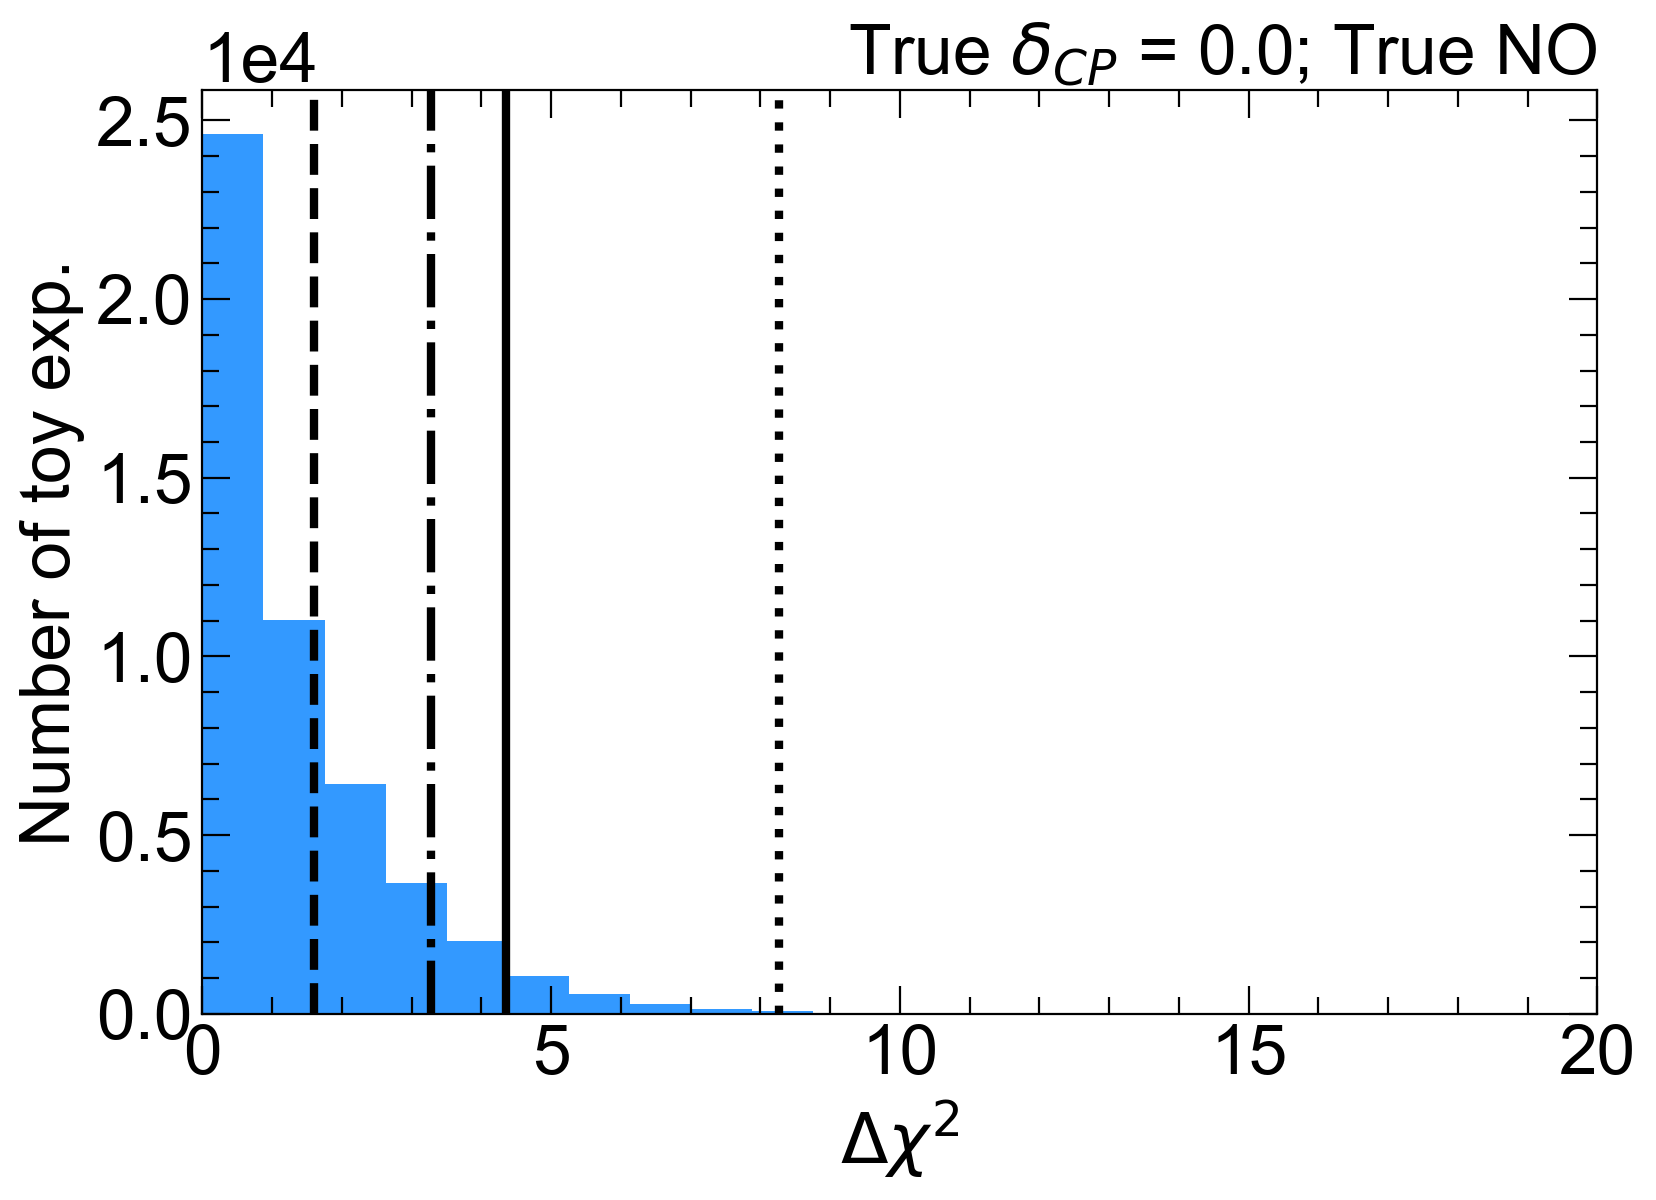

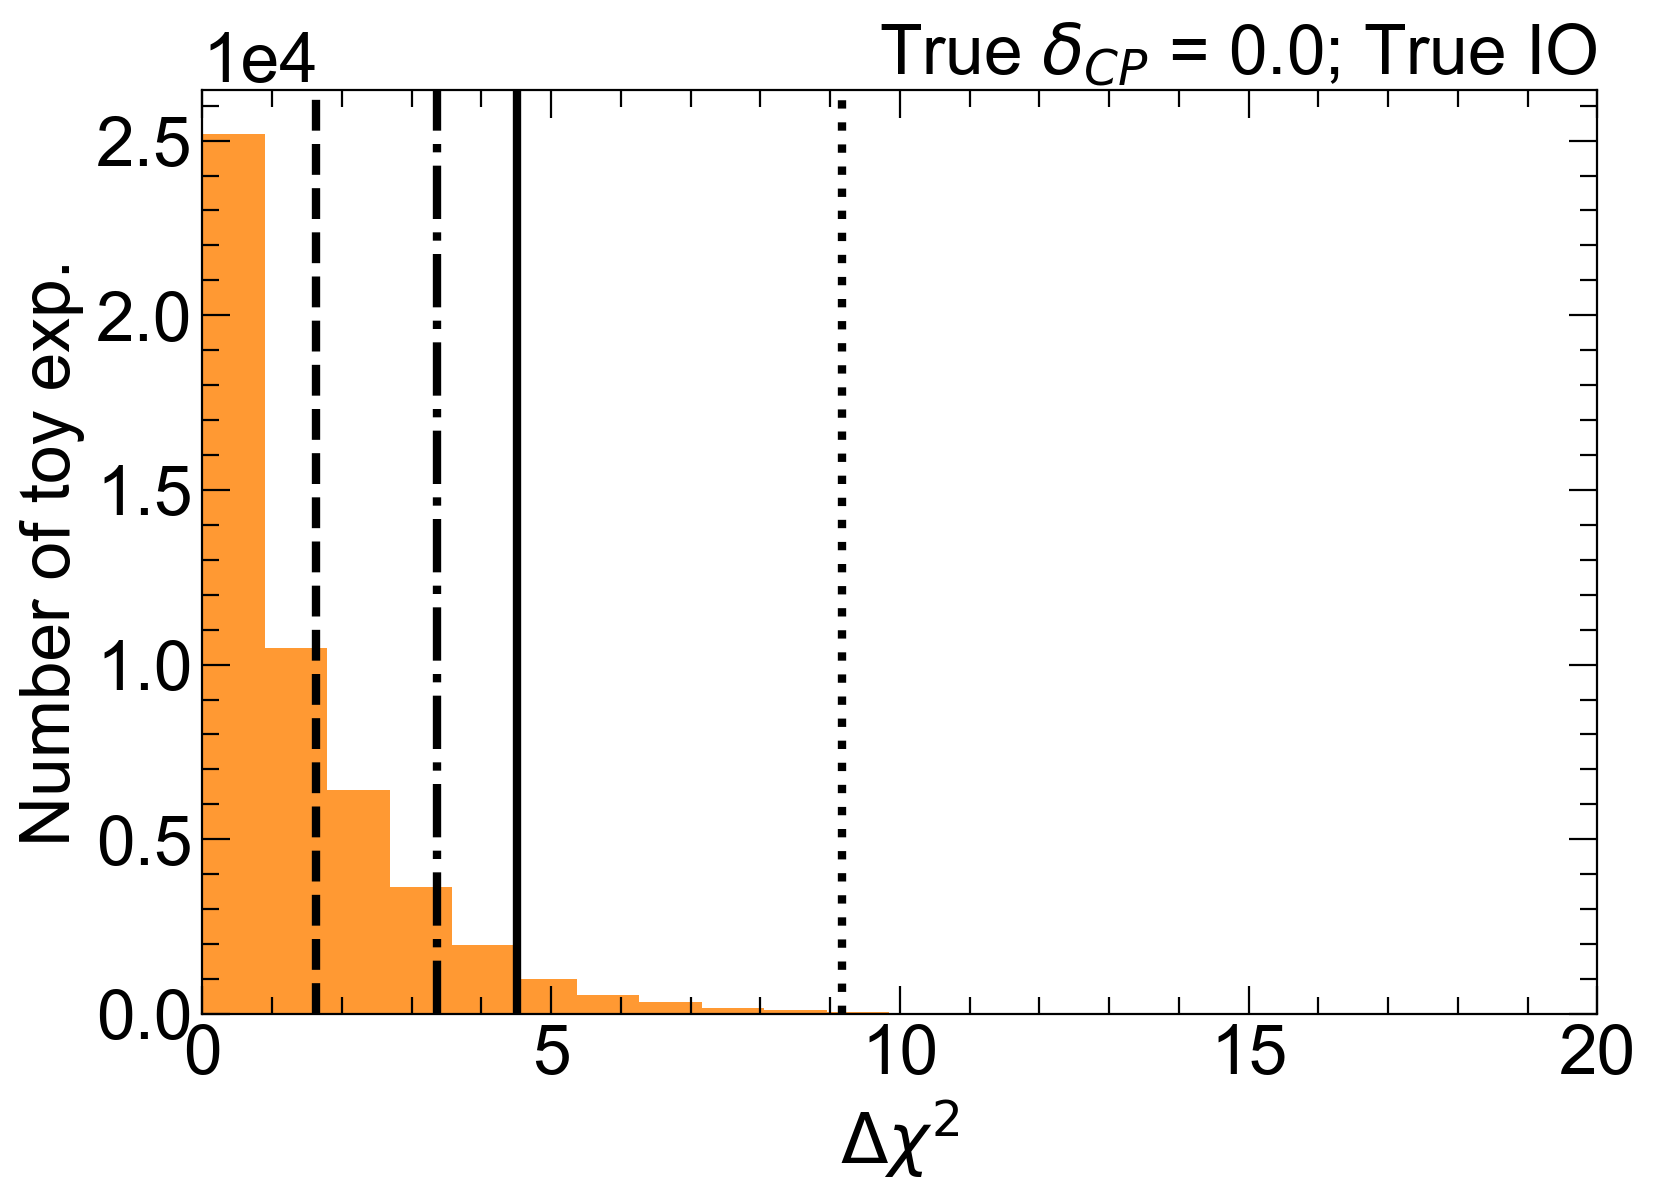

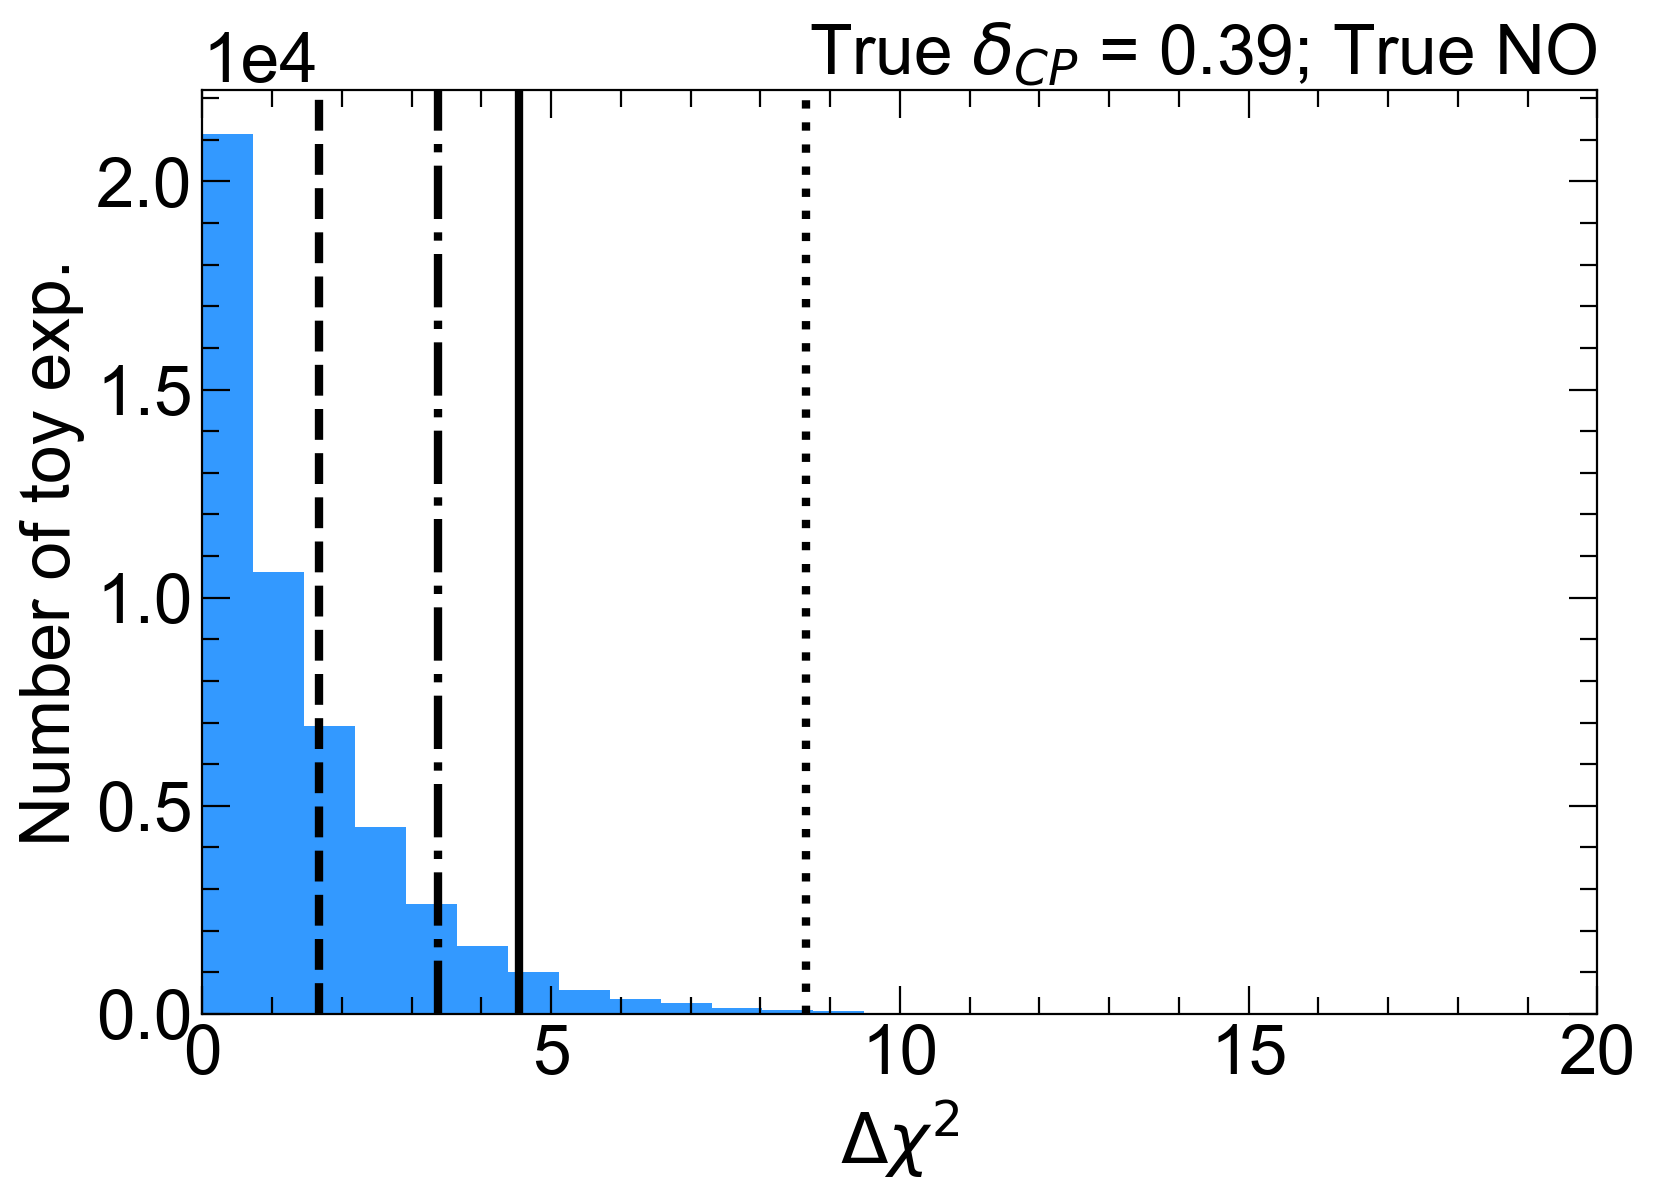

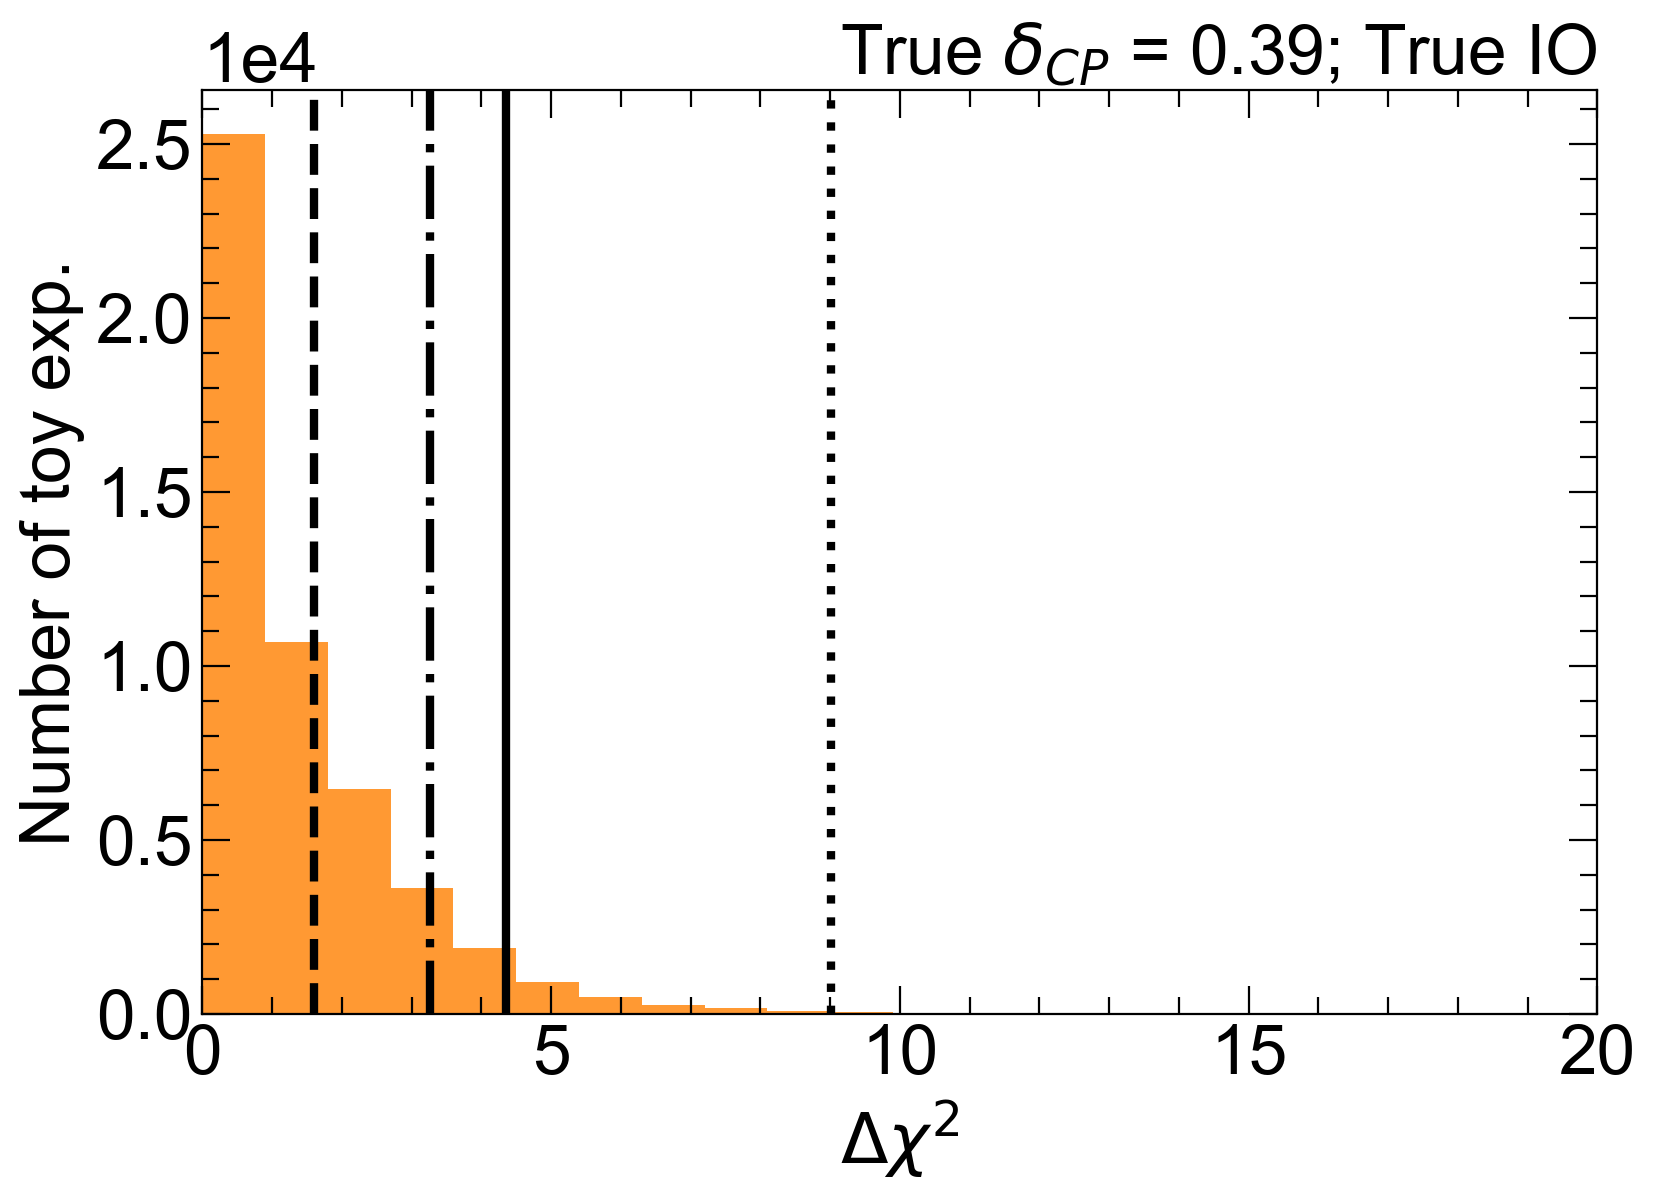

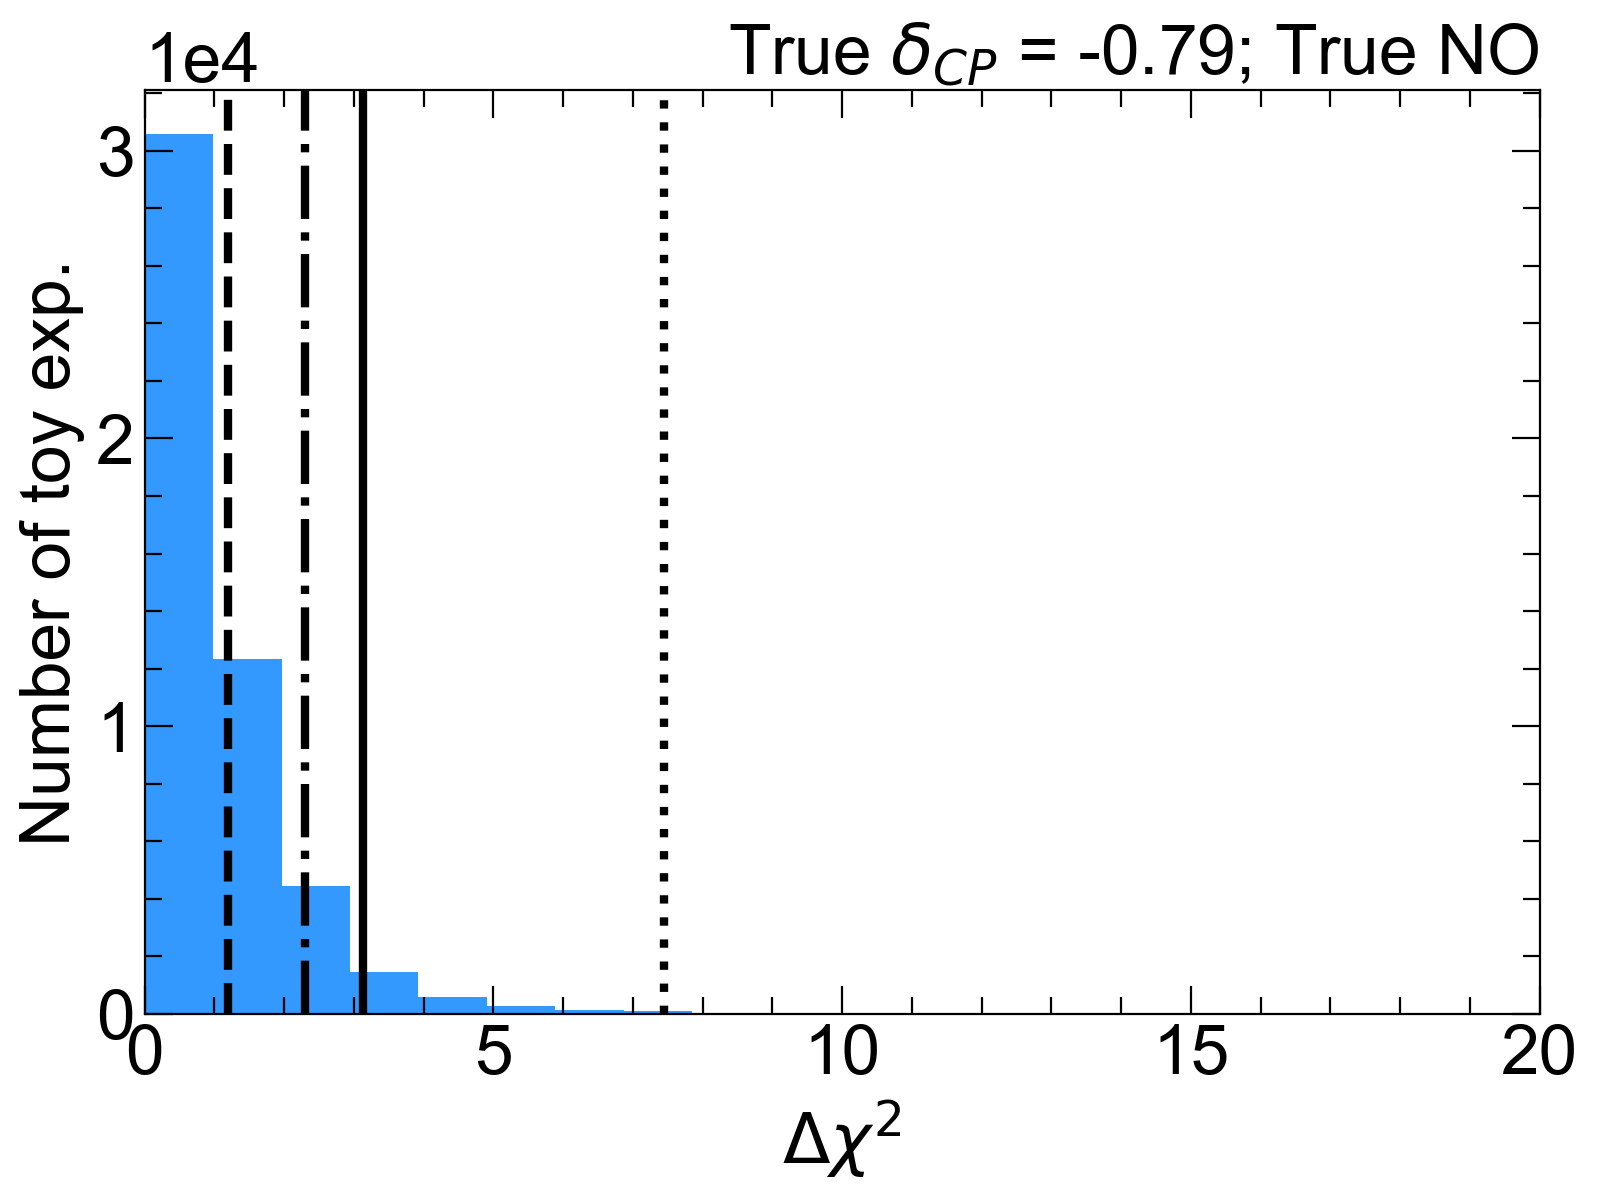

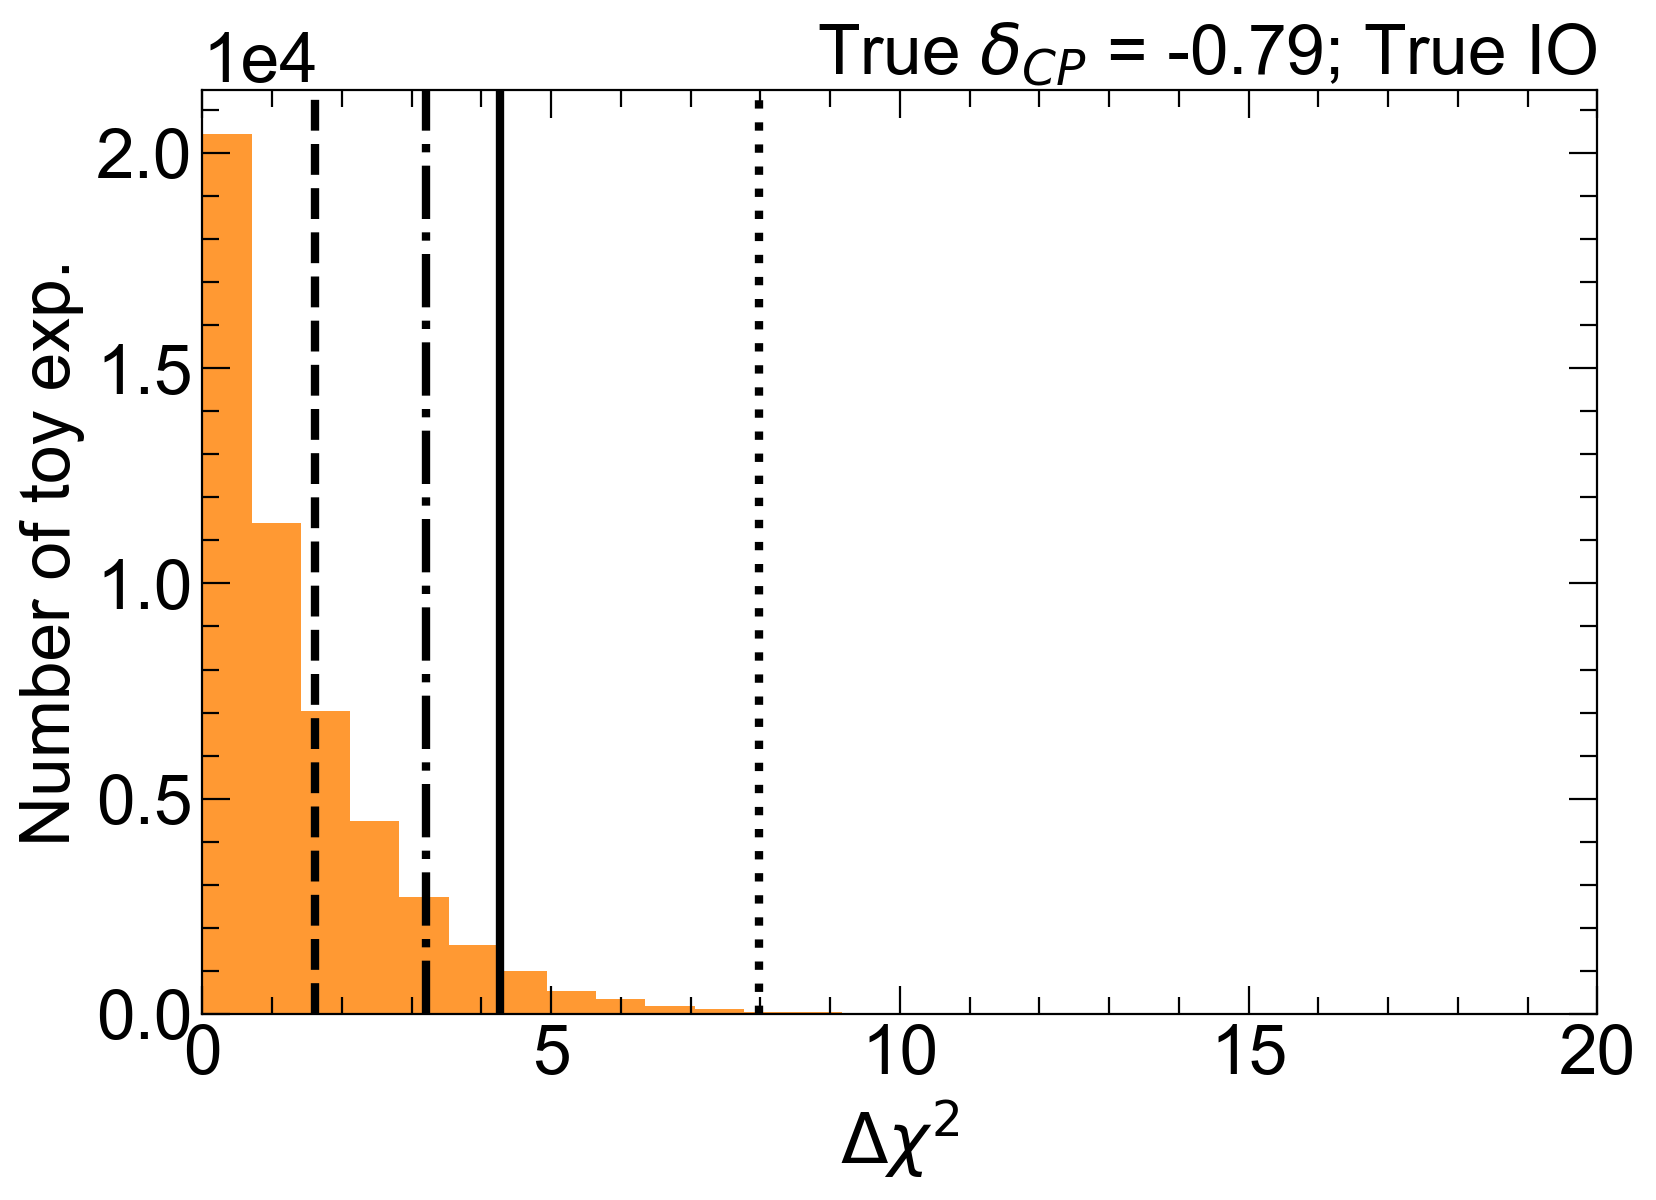

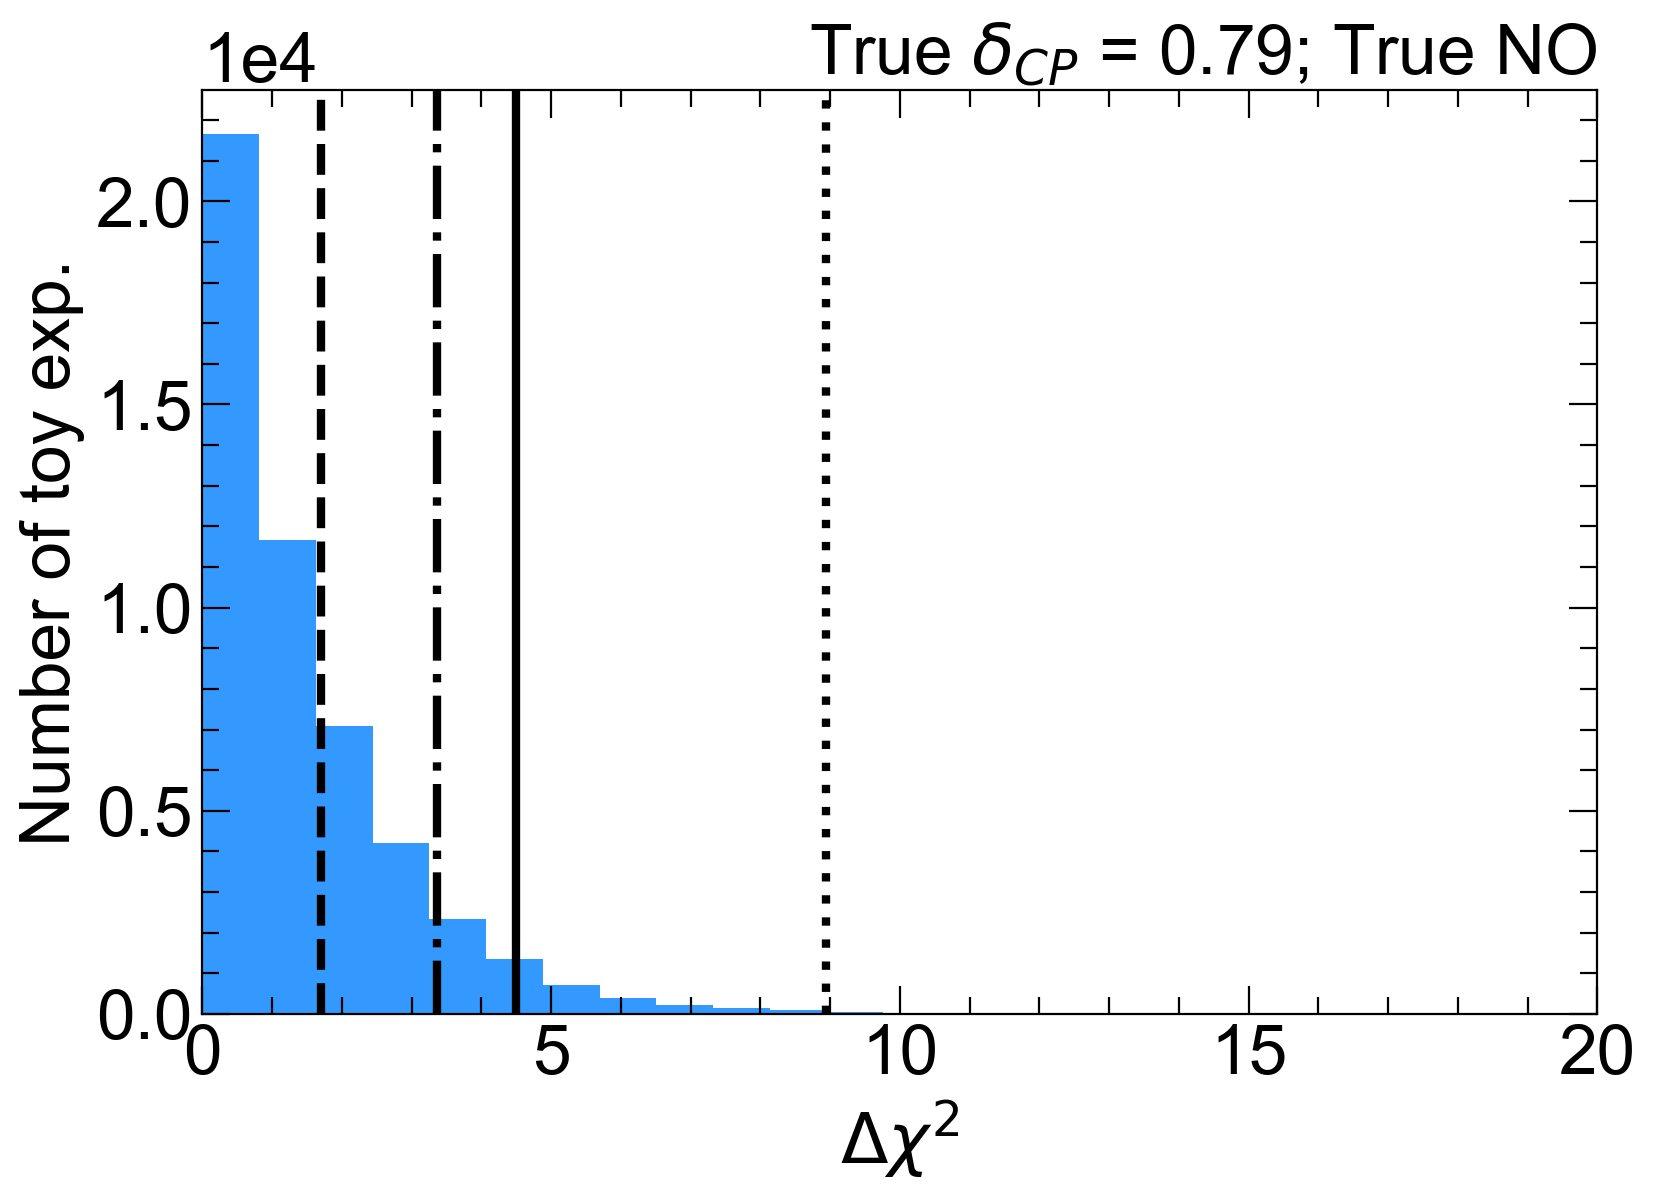

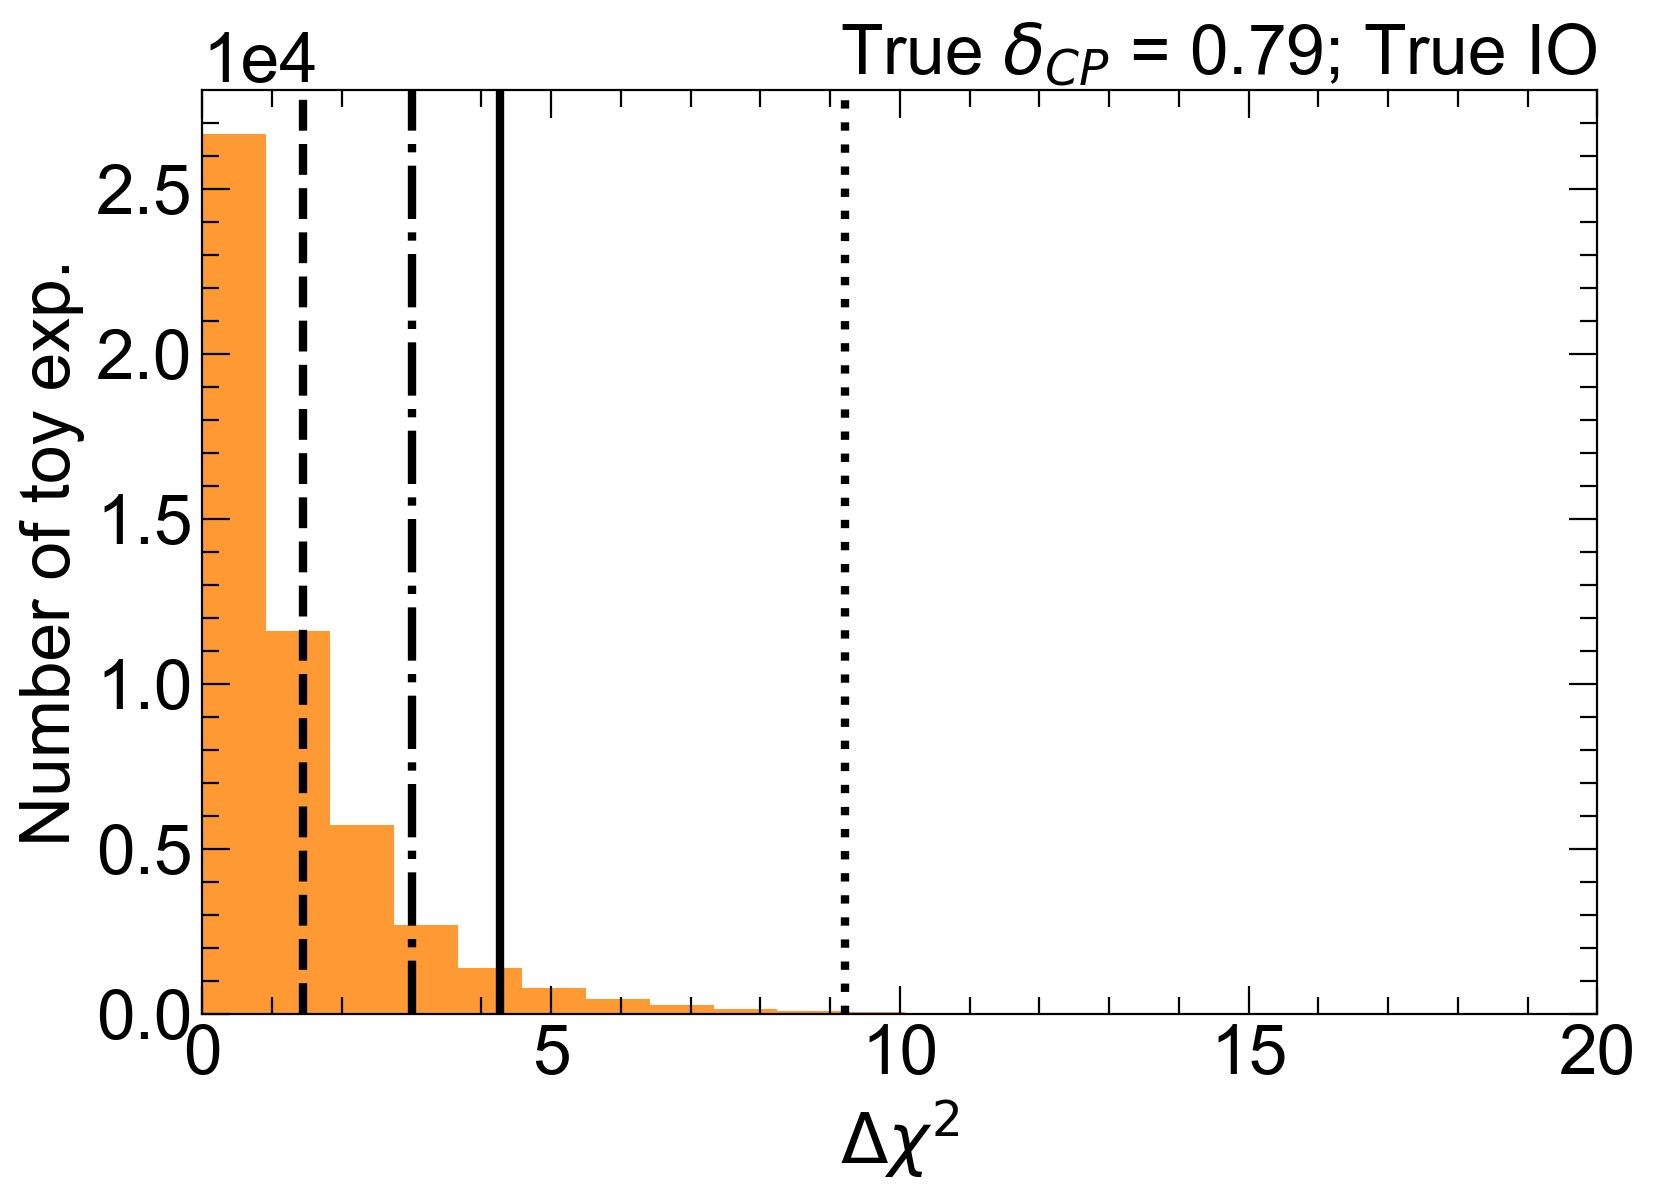

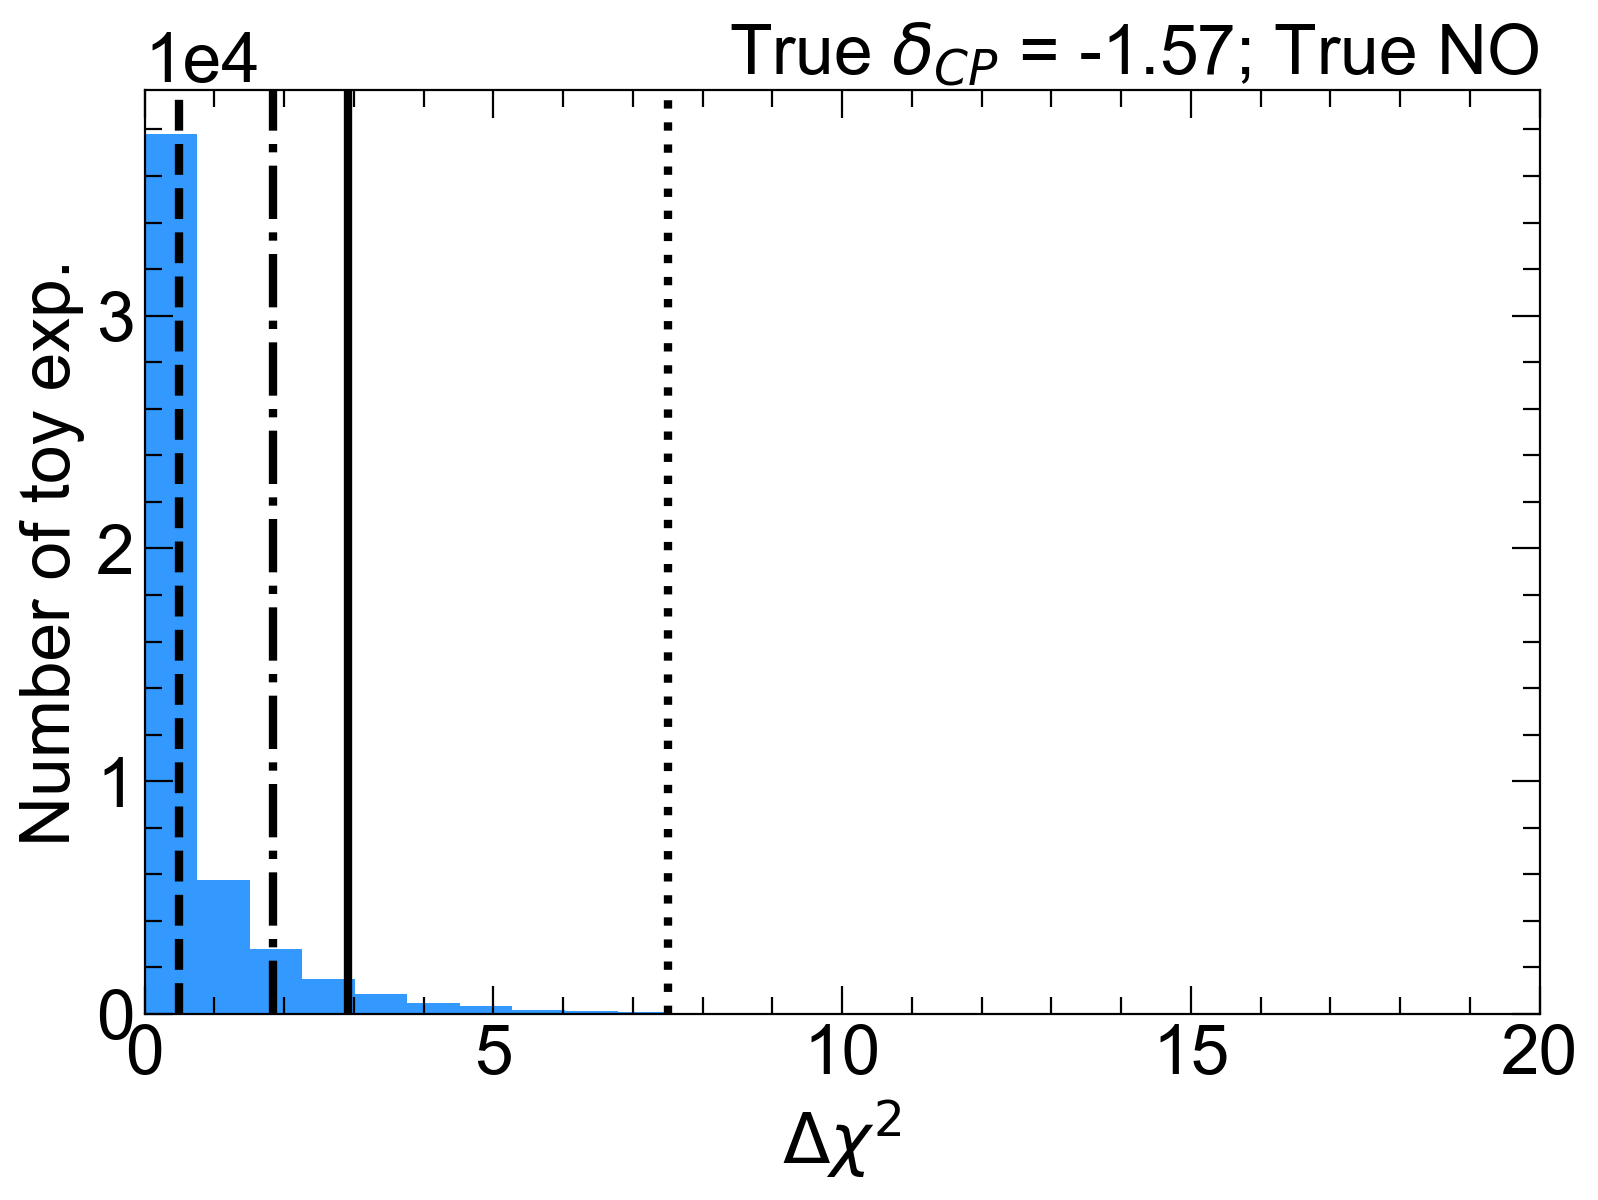

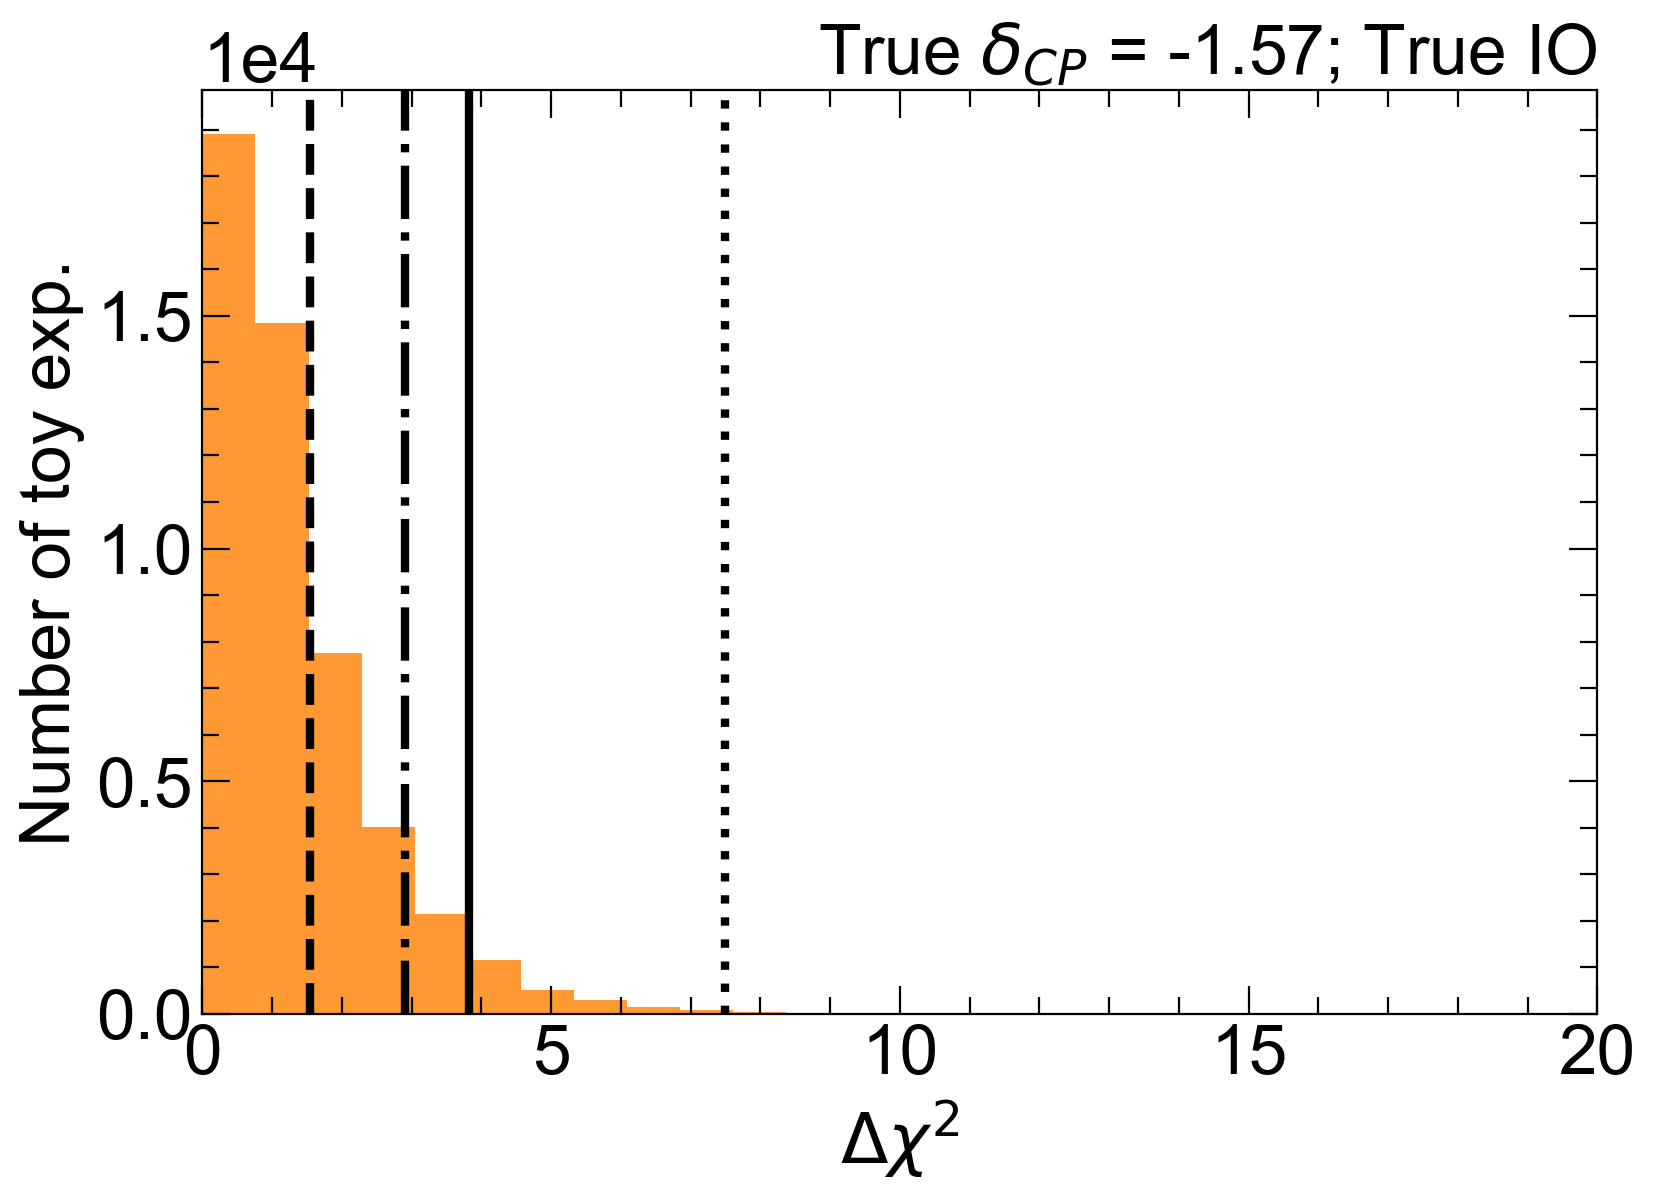

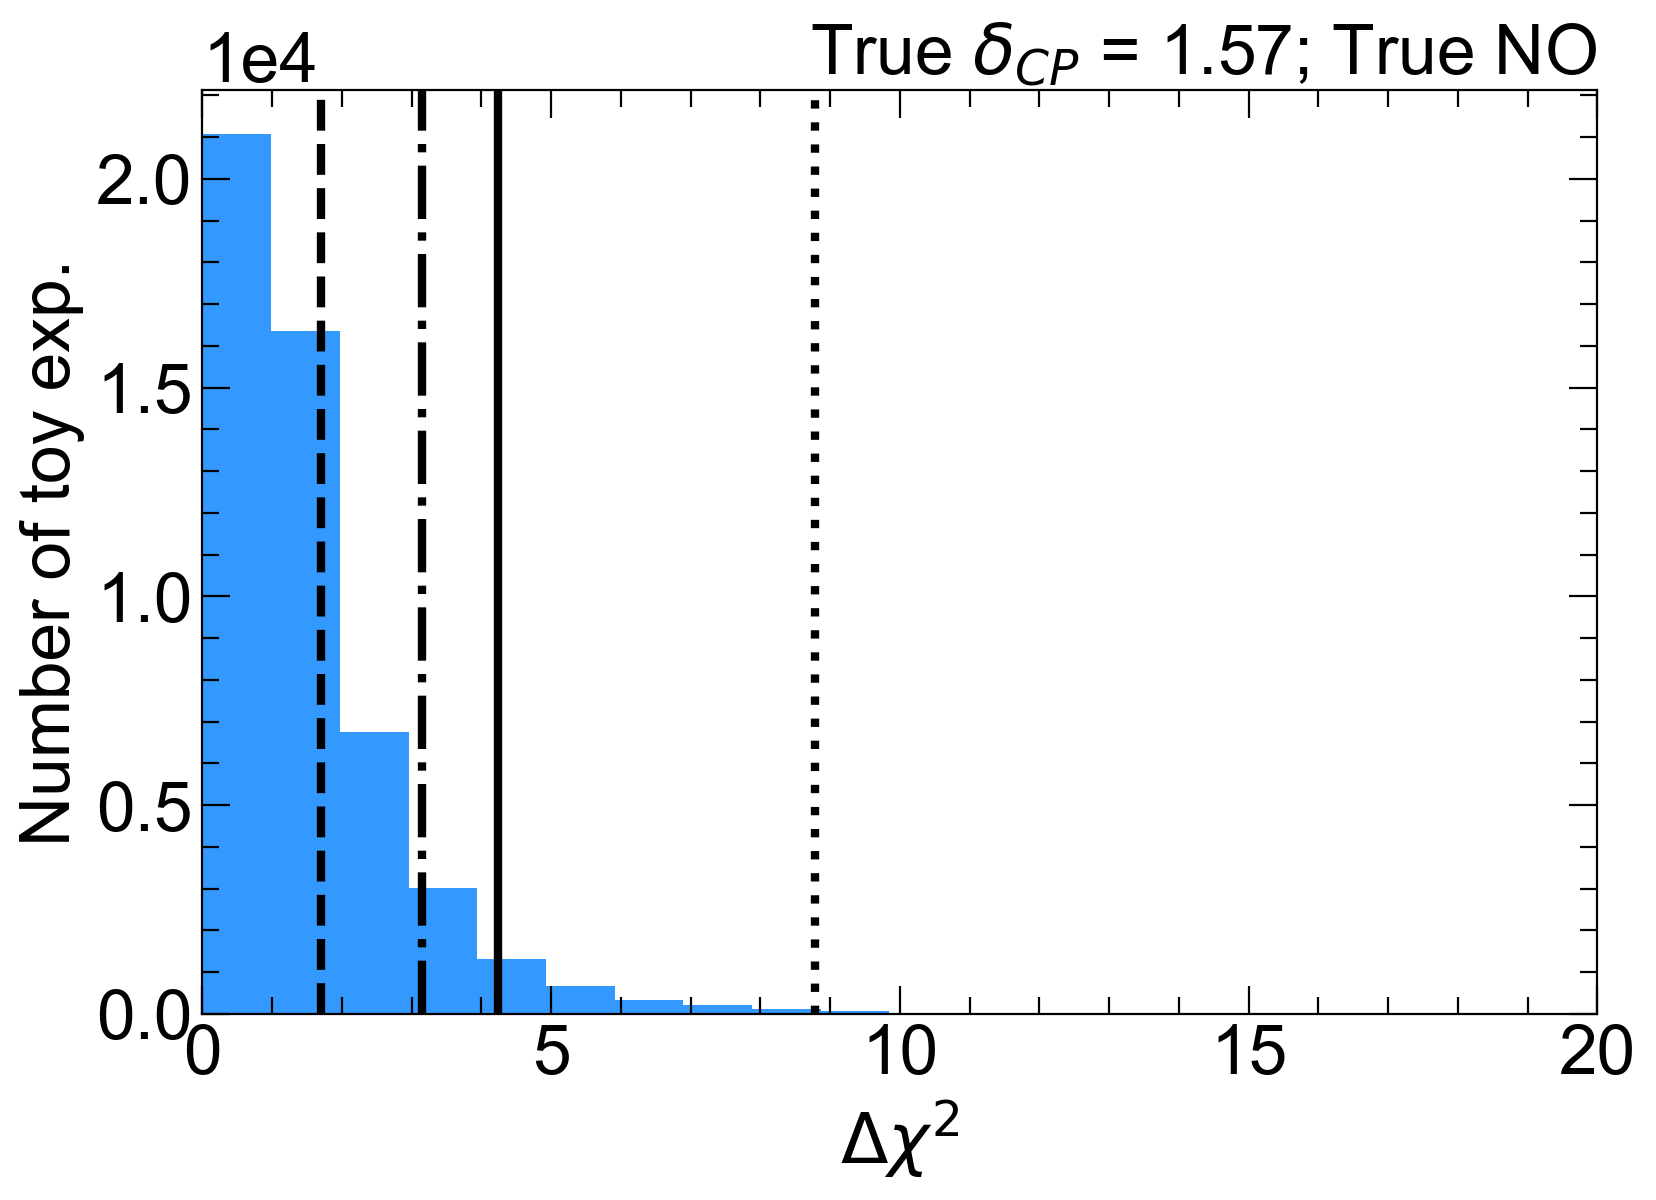

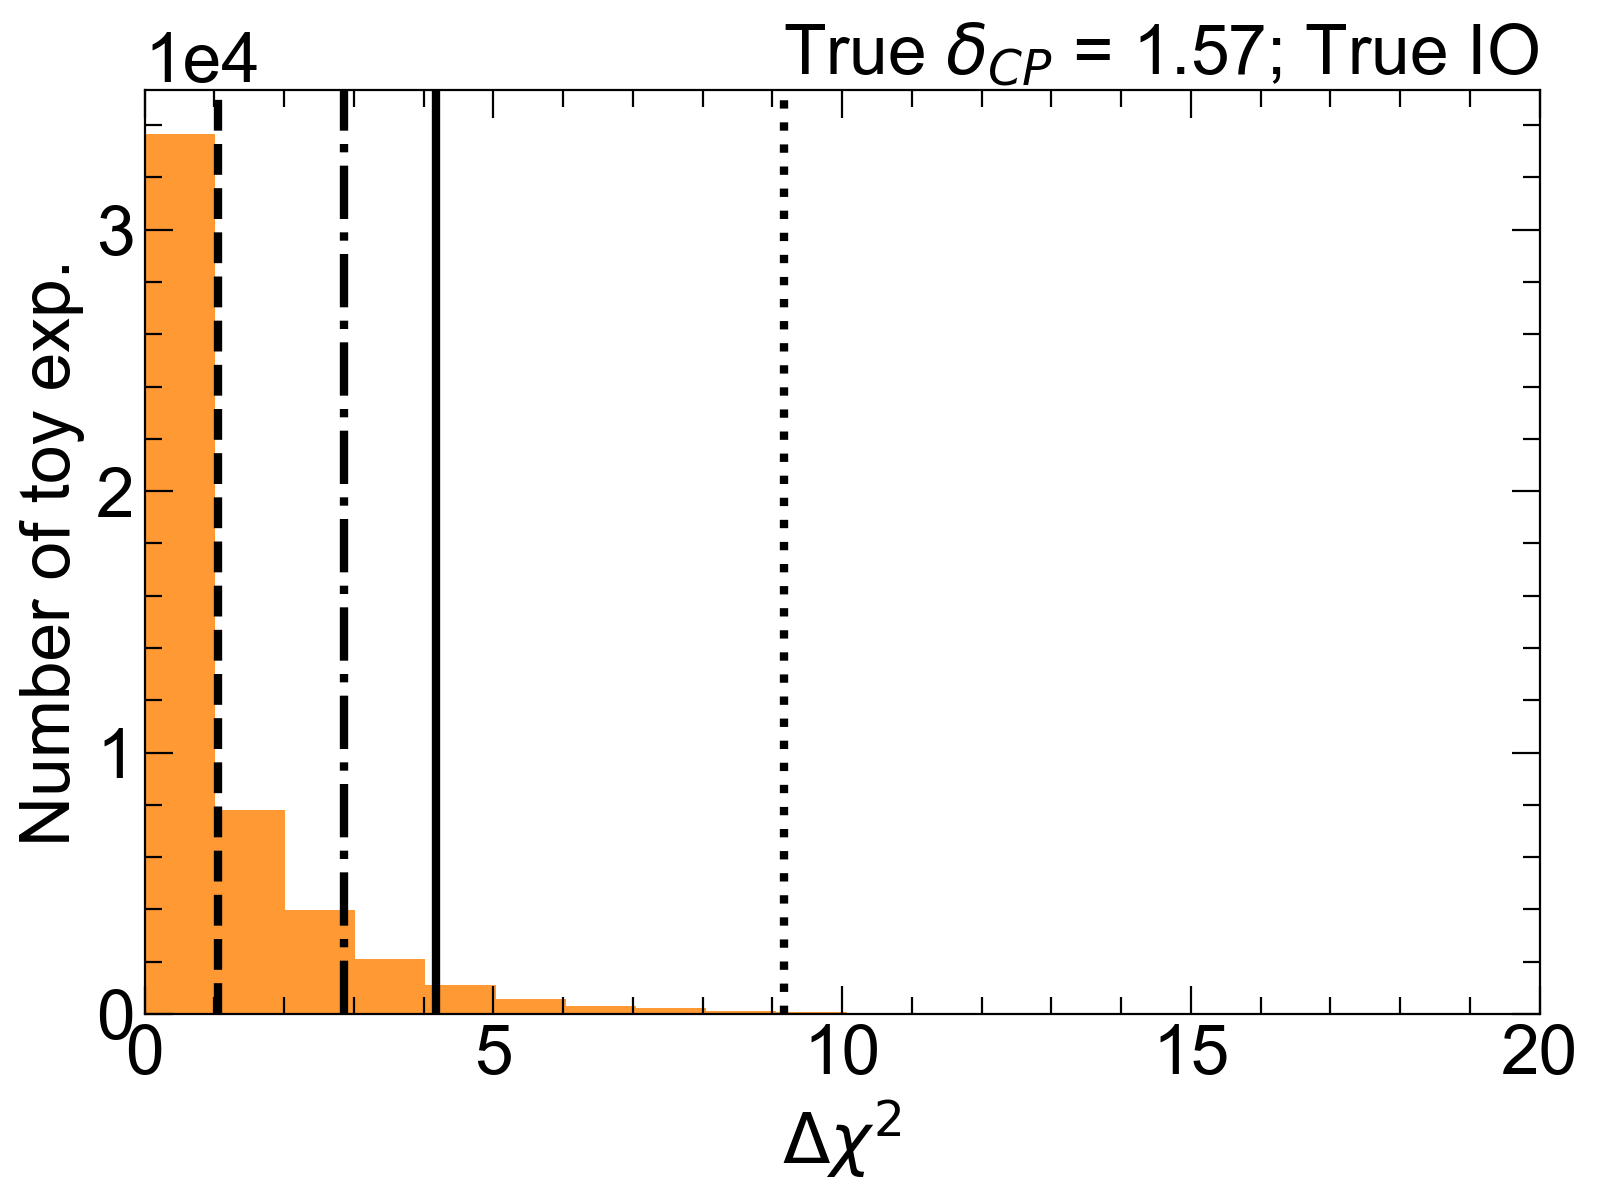

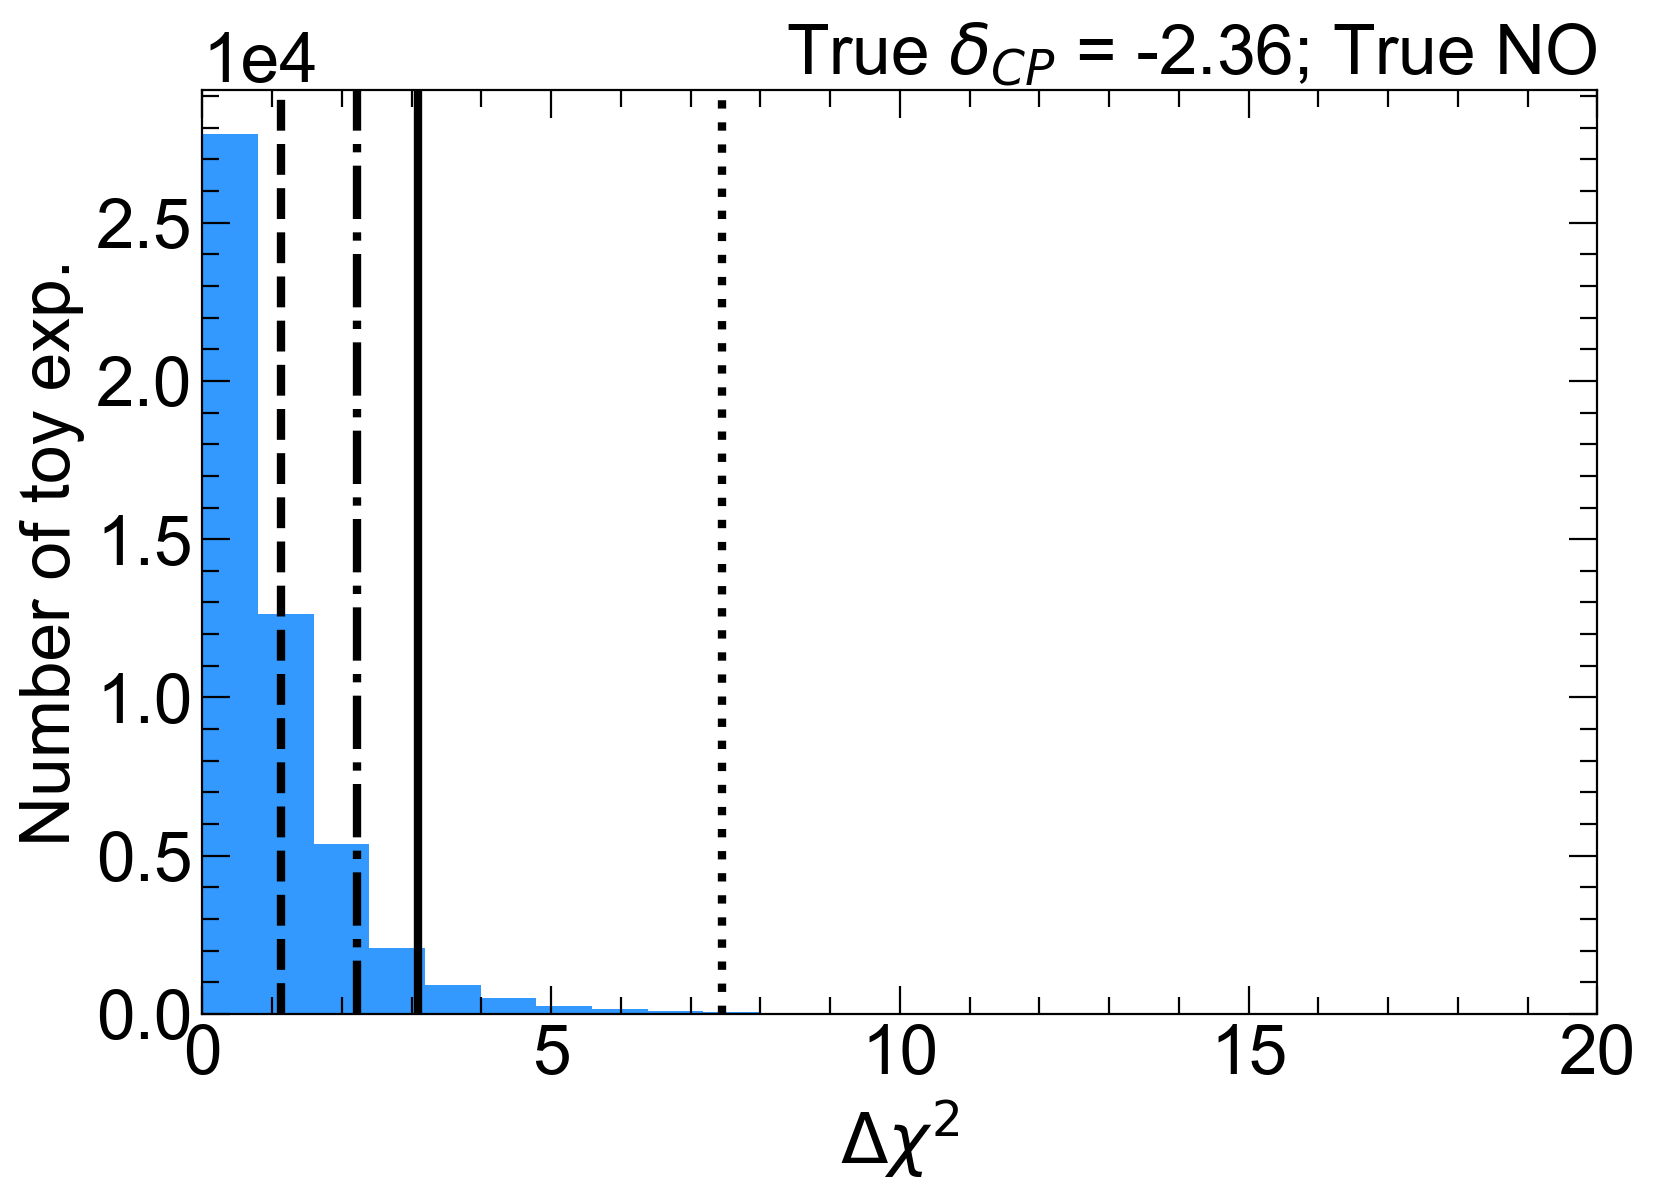

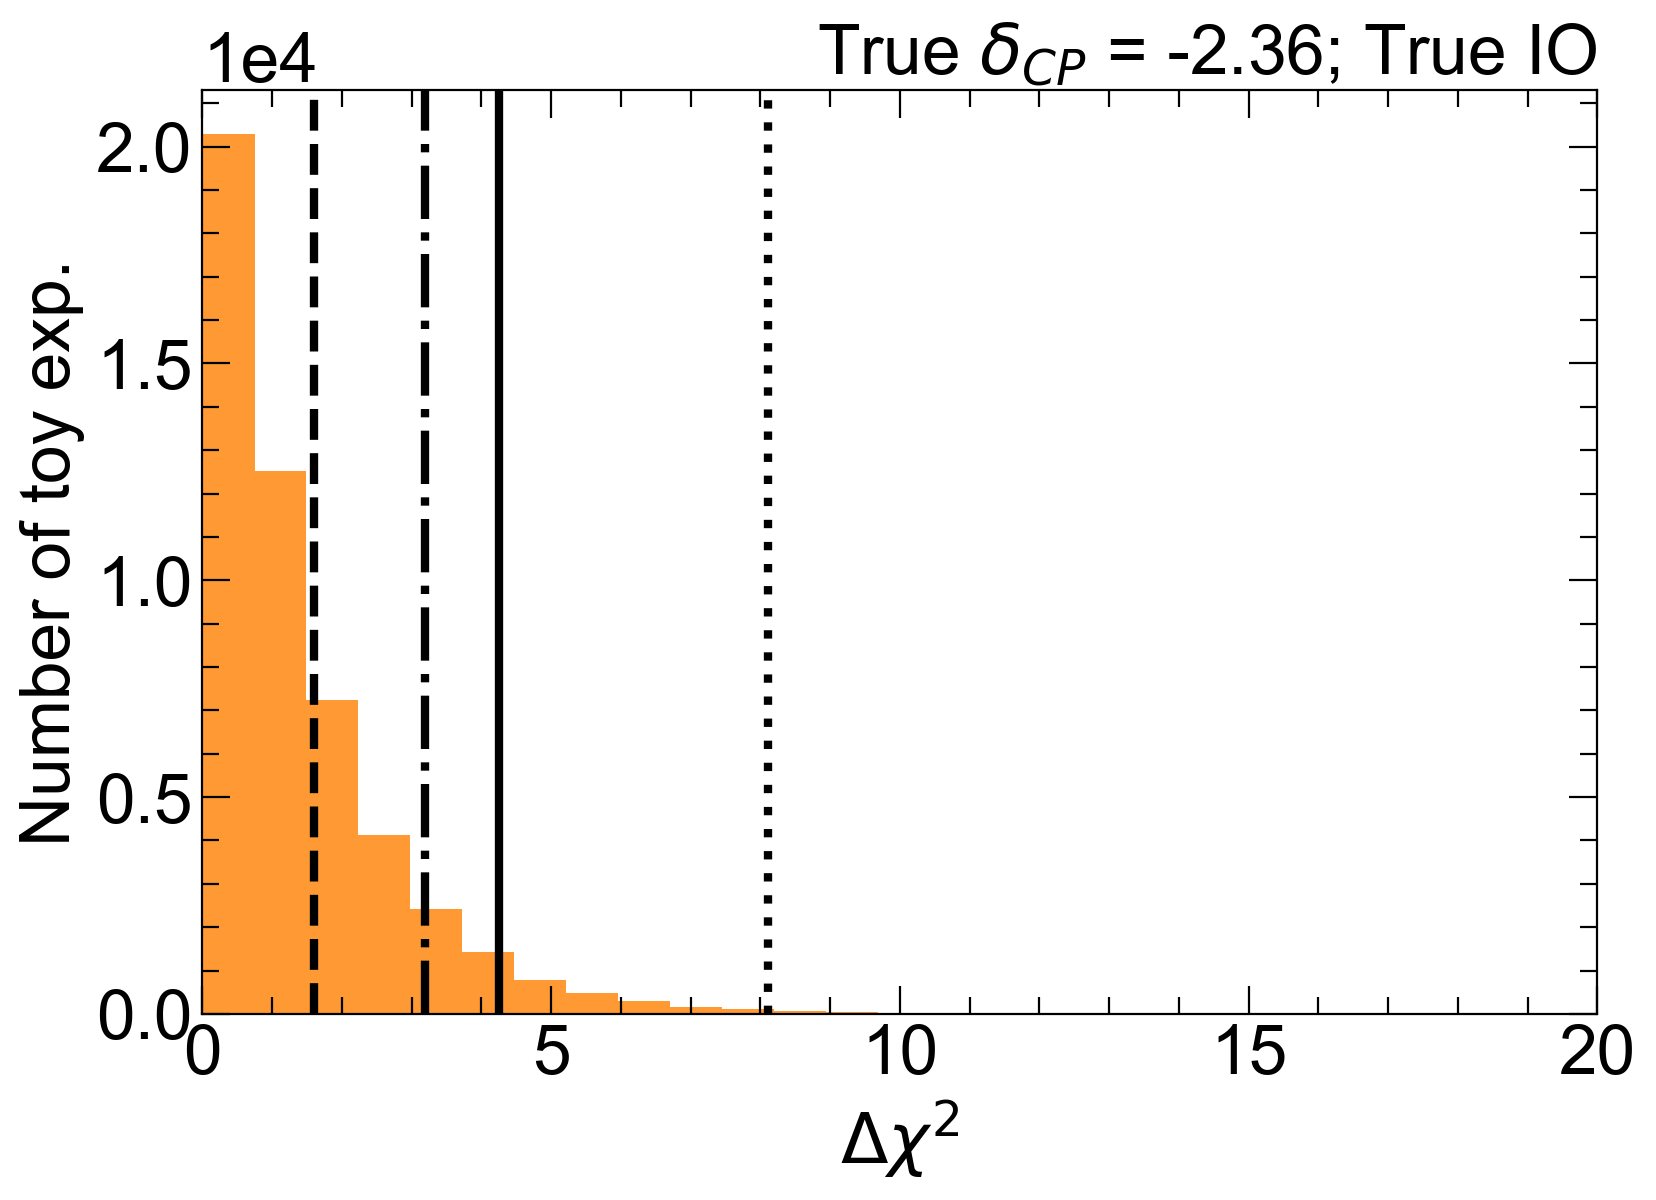

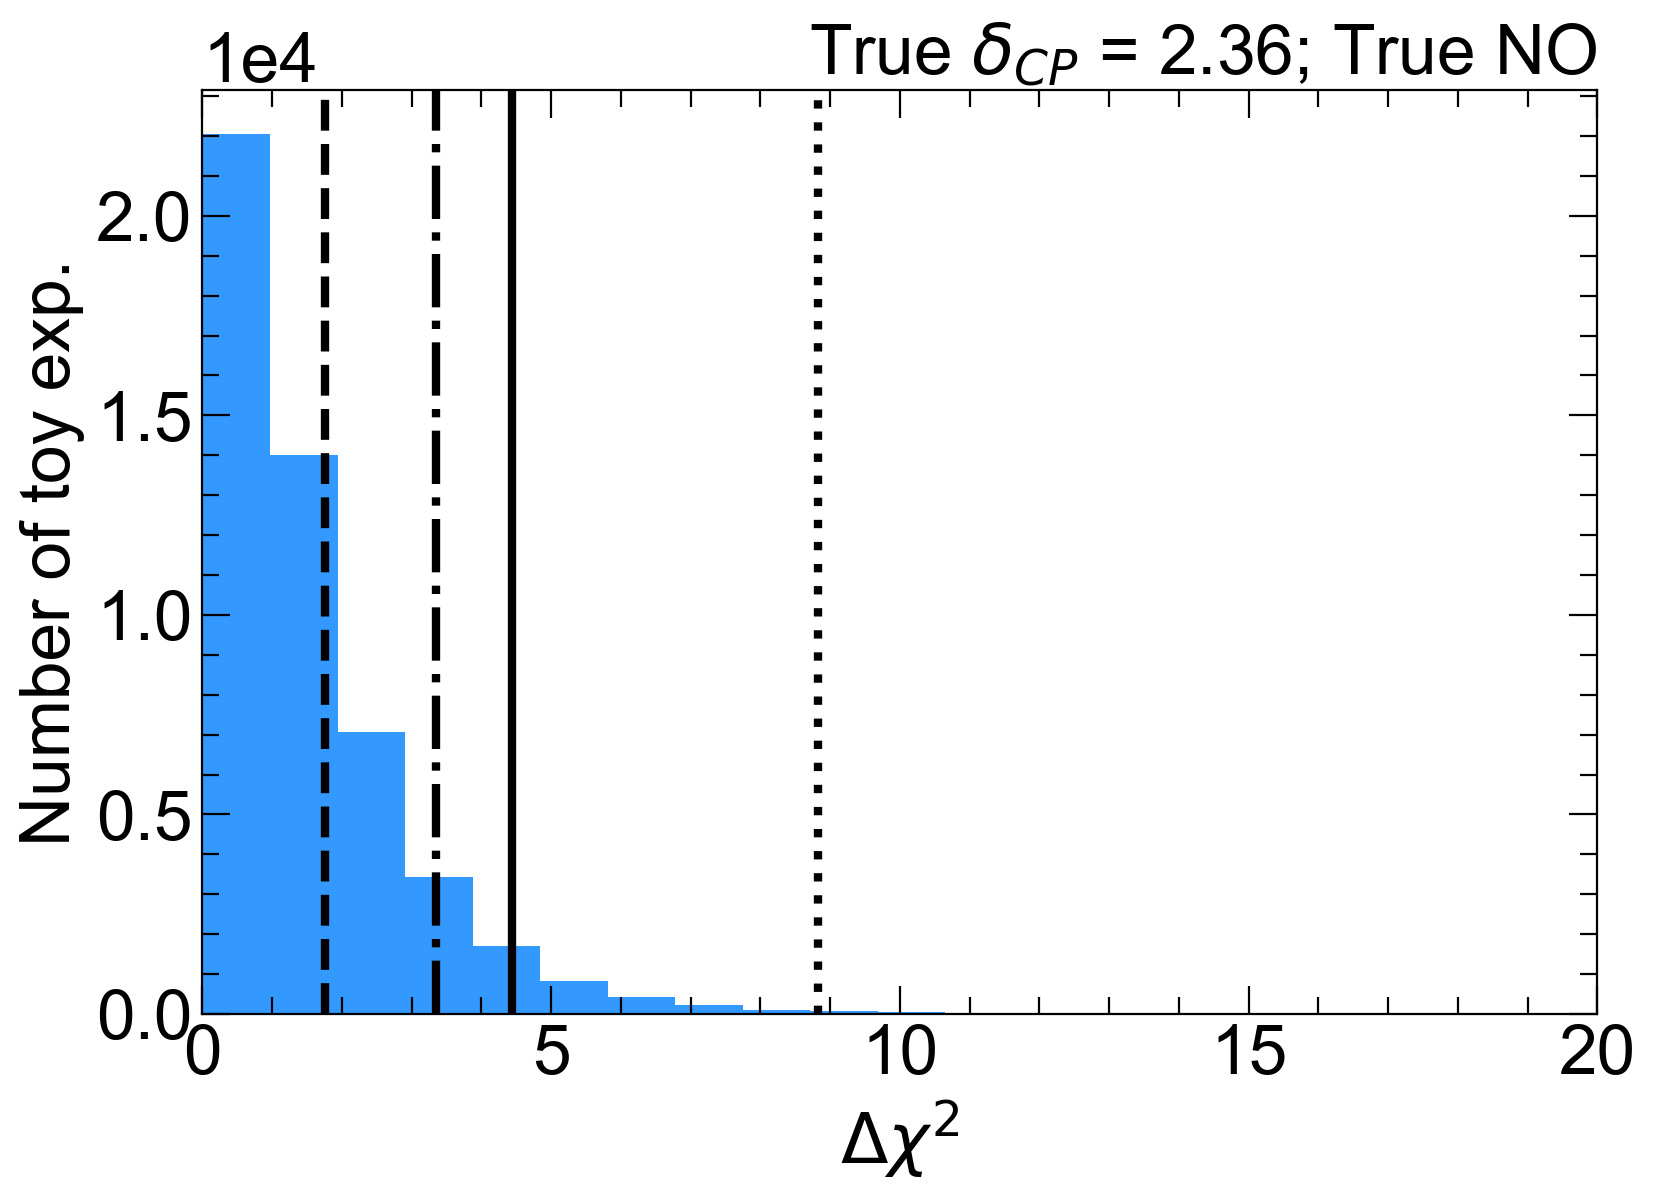

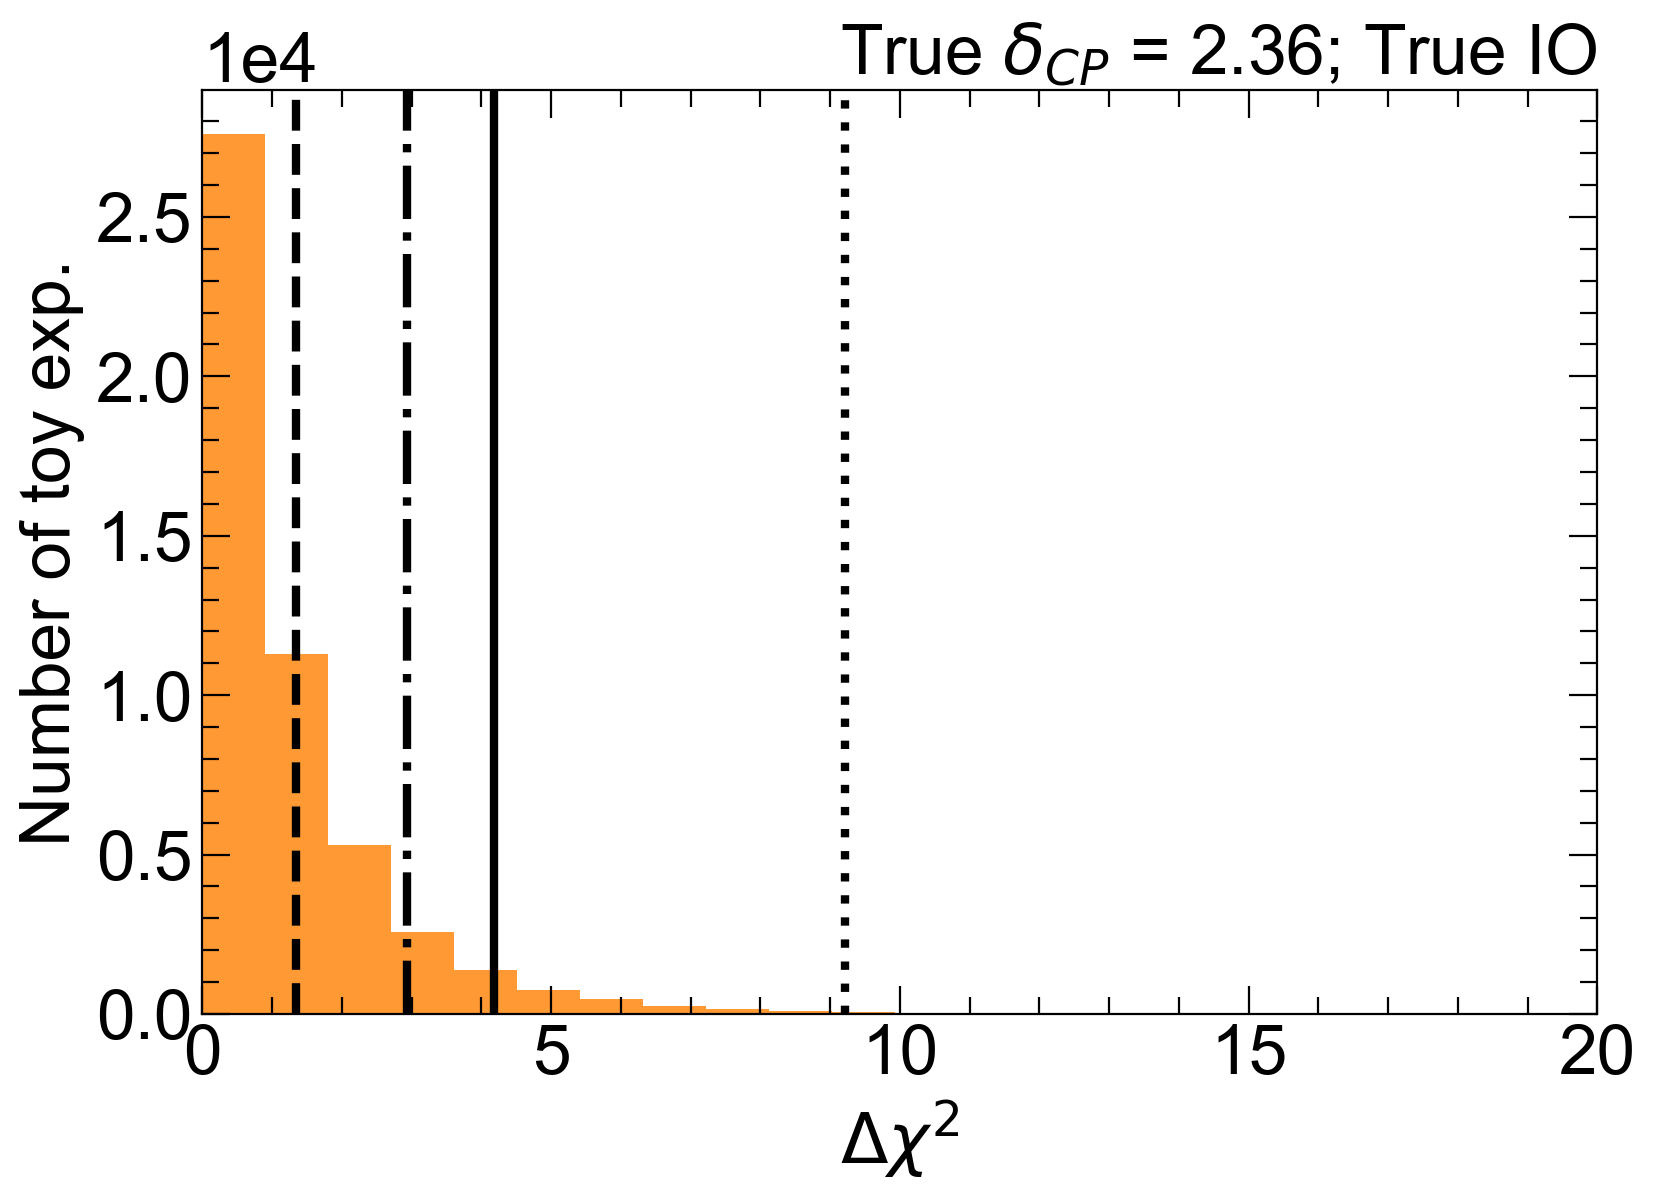

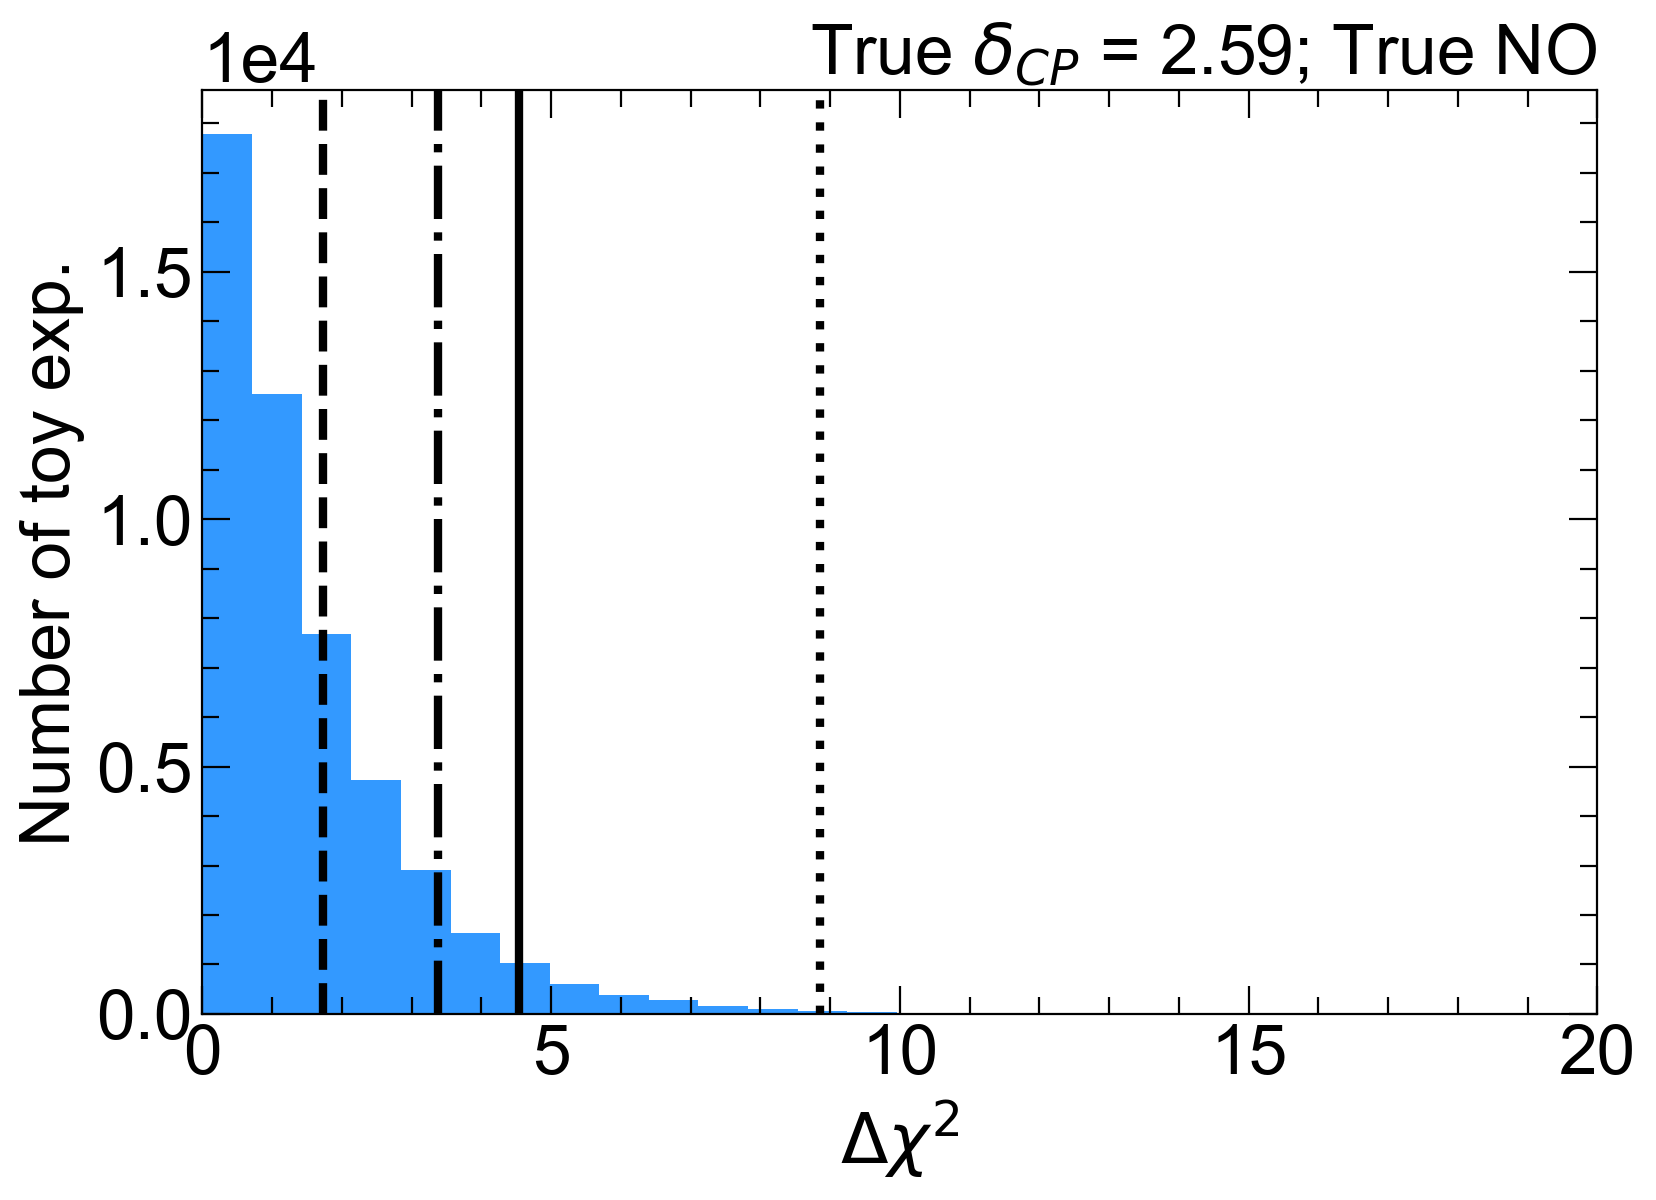

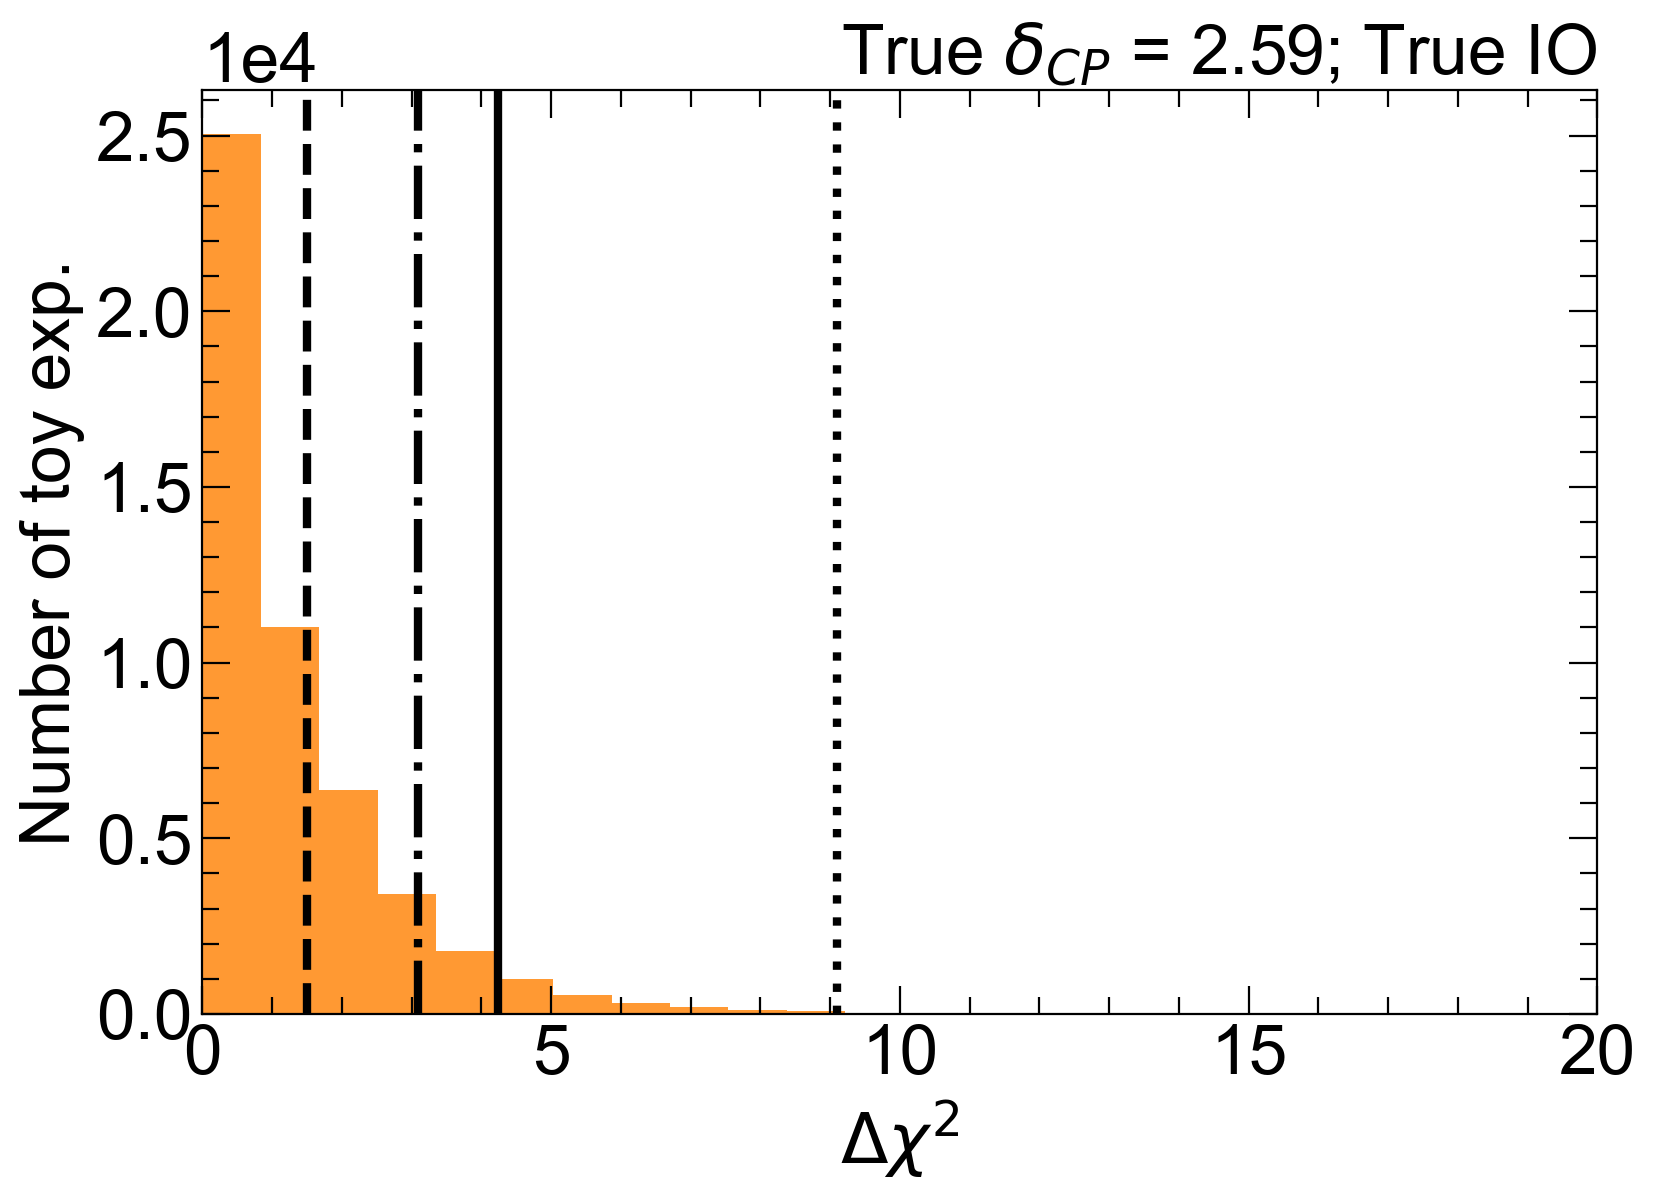

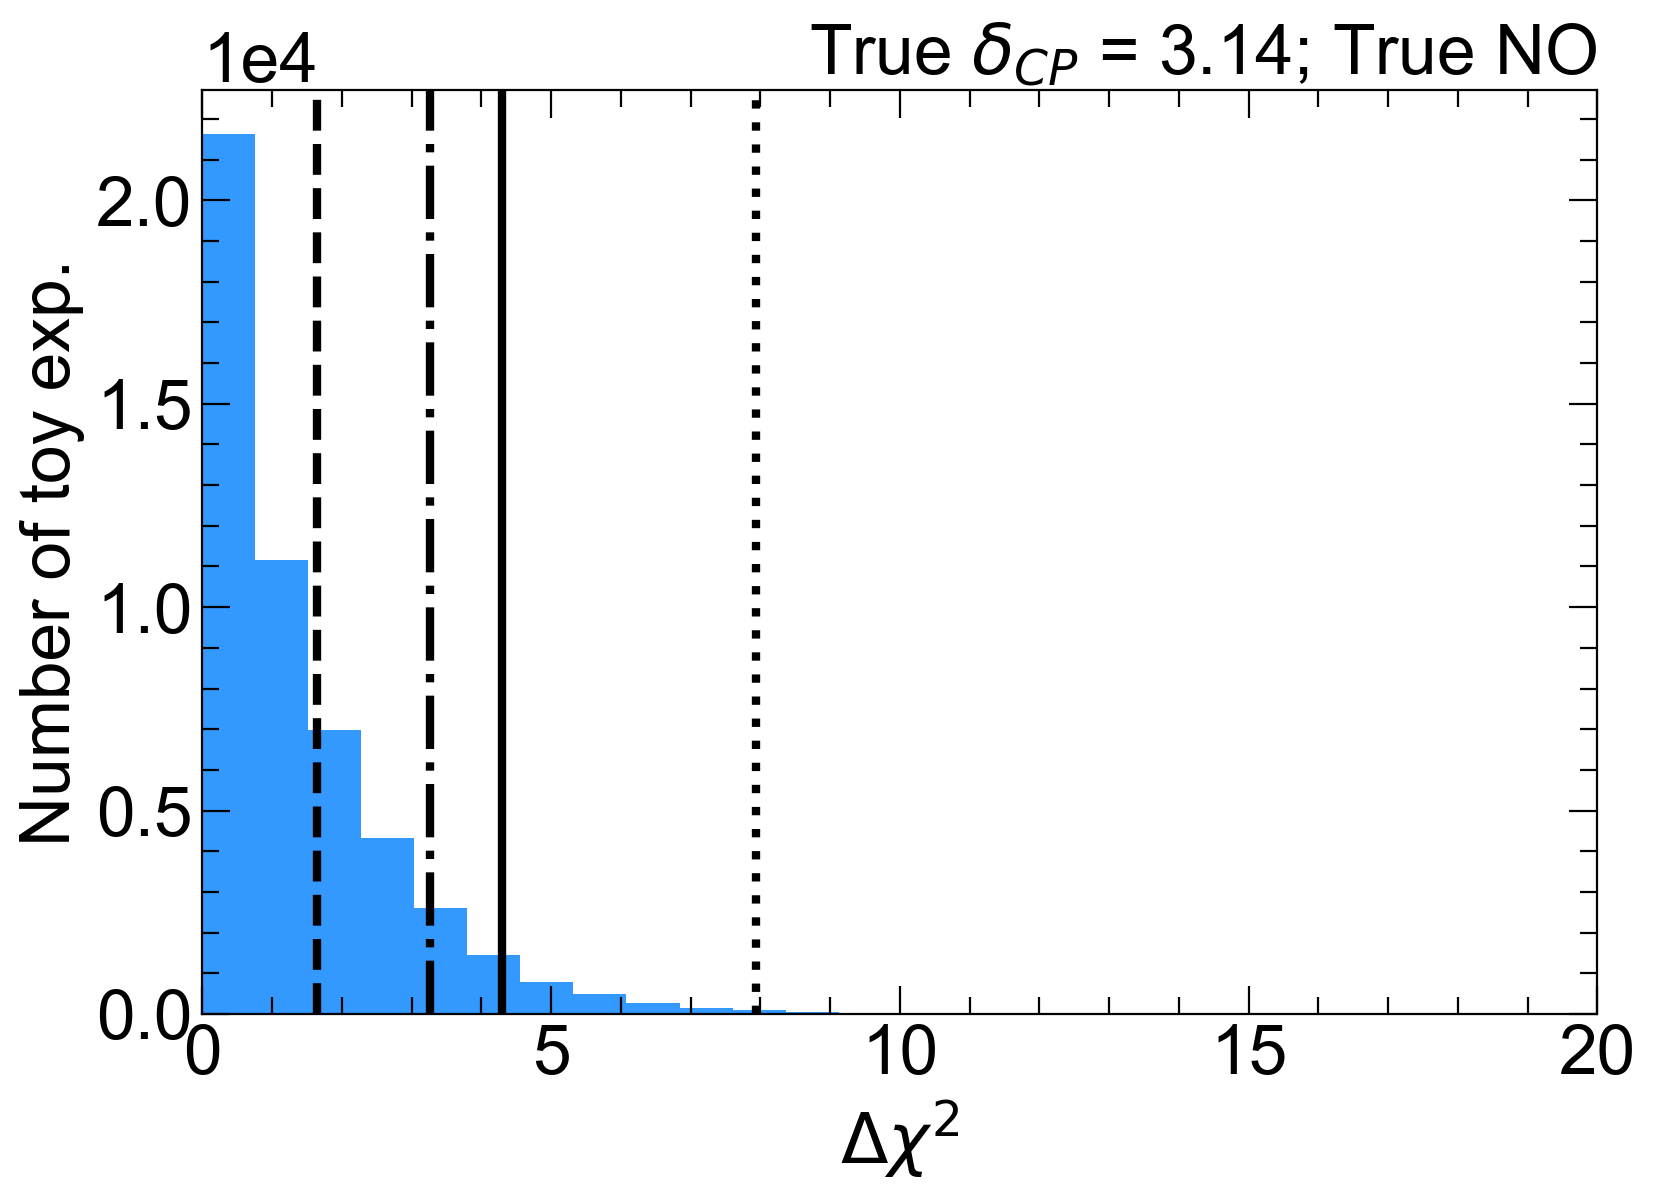

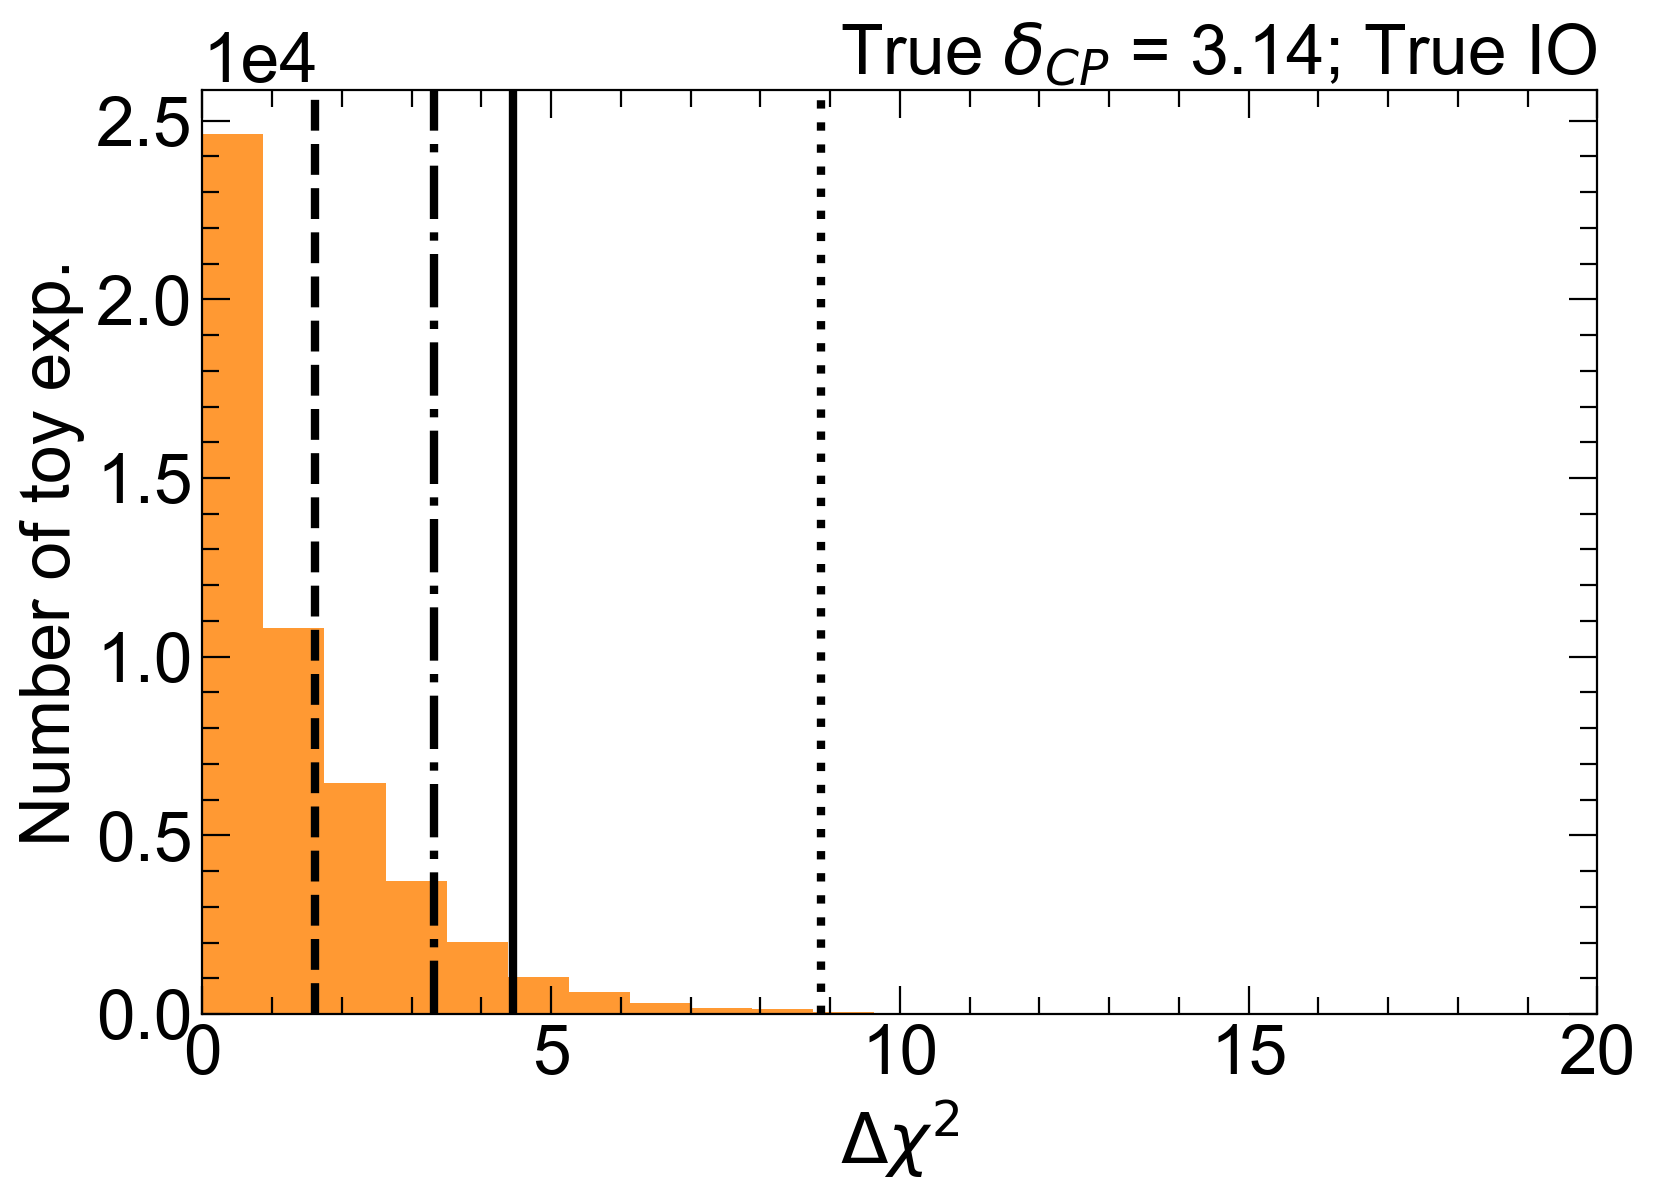

In [10]:
param_name = 'delta'
for true_param_str in param_values_FC[param_name]:
    for true_mh in [0, 1]:
        true_param_val = float(true_param_str)
        fig, ax = plt.subplots()
        basename_directory = f"MargTemplates_LucileThesis_fit_FC{suffix[param_name]}_{true_param_str}_{true_mh}_FullSyst_wRC_etheta_ptheta_{param_name}"
        base_dir = f"{inputs_dir}/{dir_ver}/FC/{basename_directory}"
        Plot_FC_dchi2_and_get_critical_val(ax, param_name, base_dir, true_param_val, true_mh)

# Plot the critical values

In [11]:
def plot_crit_val(ax, params_name_flatted, true_param_grid_sorted, true_mh):
    crit_val_central = defaultdict(list)
    crit_val_lower = defaultdict(list)
    crit_val_upper = defaultdict(list)
    levels = []
    for true_param in true_param_grid_sorted:
        data = np.load(f"{outputs_dir}/files/{dir_ver}/FC/CriticalDchi2_{param_name_x}_{true_param}_truemh{true_mh}.npy")
        for i, level in enumerate(data['level']):
            crit_val_central[level].append(data['Central'][i])
            crit_val_lower[level].append(data['Lower'][i])
            crit_val_upper[level].append(data['Upper'][i])
        levels = data['level']

    ax.axhline(1, ls='--', color='grey', linewidth=2)
    ax.axhline(4, ls='--', color='grey', linewidth=2)
    ax.axhline(9, ls='--', color='grey', linewidth=2)
    ax.axhline(CL_to_chi2critval(0.9, dof=1), ls='--', color='grey', linewidth=2)
    
    for level in levels:
        ax.plot(true_param_grid_sorted, crit_val_central[level], color=critval_level_to_color[true_mh][level], marker='o', linewidth=2, label=level_to_label[level])
        ax.plot(true_param_grid_sorted, crit_val_lower[level], color=critval_level_to_color[true_mh][level],  linewidth=1)
        ax.plot(true_param_grid_sorted, crit_val_upper[level], color=critval_level_to_color[true_mh][level],  linewidth=1)
        ax.fill_between(true_param_grid_sorted, crit_val_lower[level], crit_val_upper[level], hatch='//',
                        facecolor=critval_level_to_color[true_mh][level], edgecolor='white', alpha=0.5)

    ax.set_ylim(0, 11)
    ax.set_xlim(true_param_grid_sorted[0], true_param_grid_sorted[-1])
    ax.set_xlabel(osc_param_to_title[param_name_x][0])
    ax.set_ylabel(r'$\Delta \chi^2_c$')
    
    show_minor_ticks(ax)
    ax.legend(ncol=2, fontsize=15, loc='upper center')
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


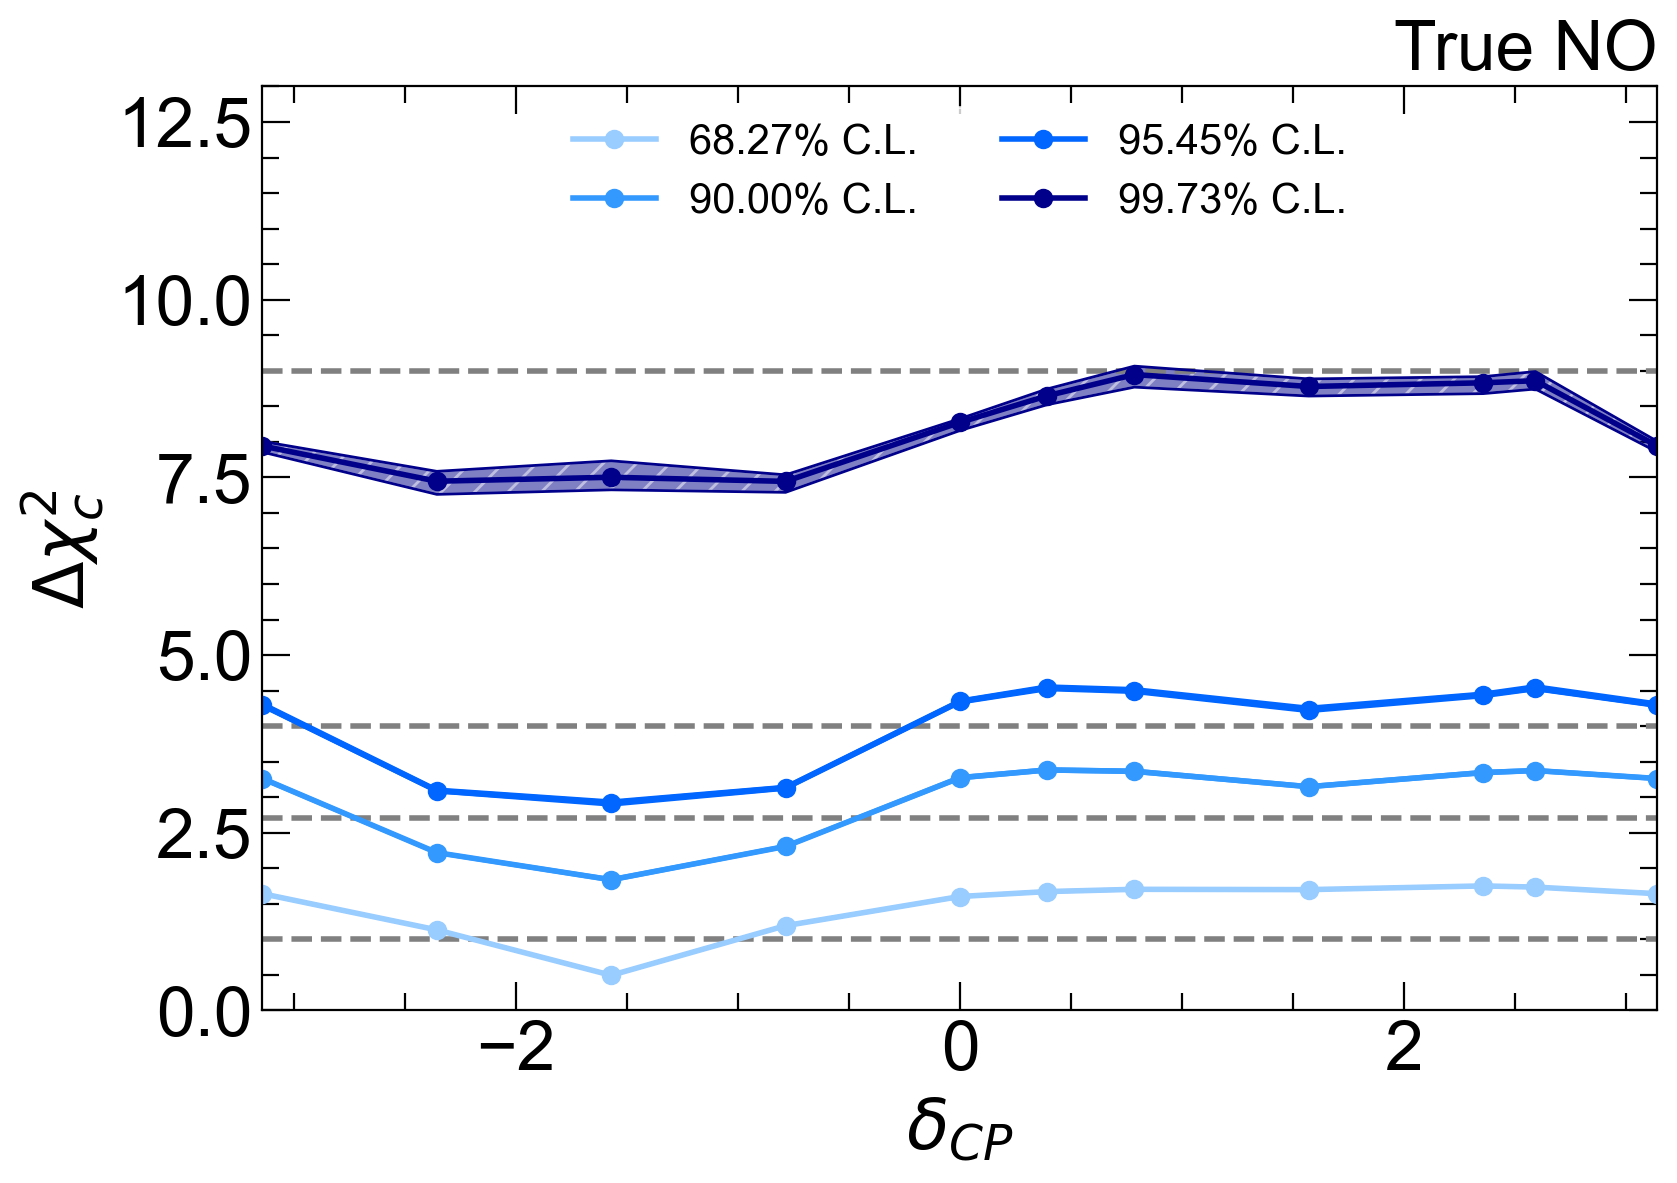

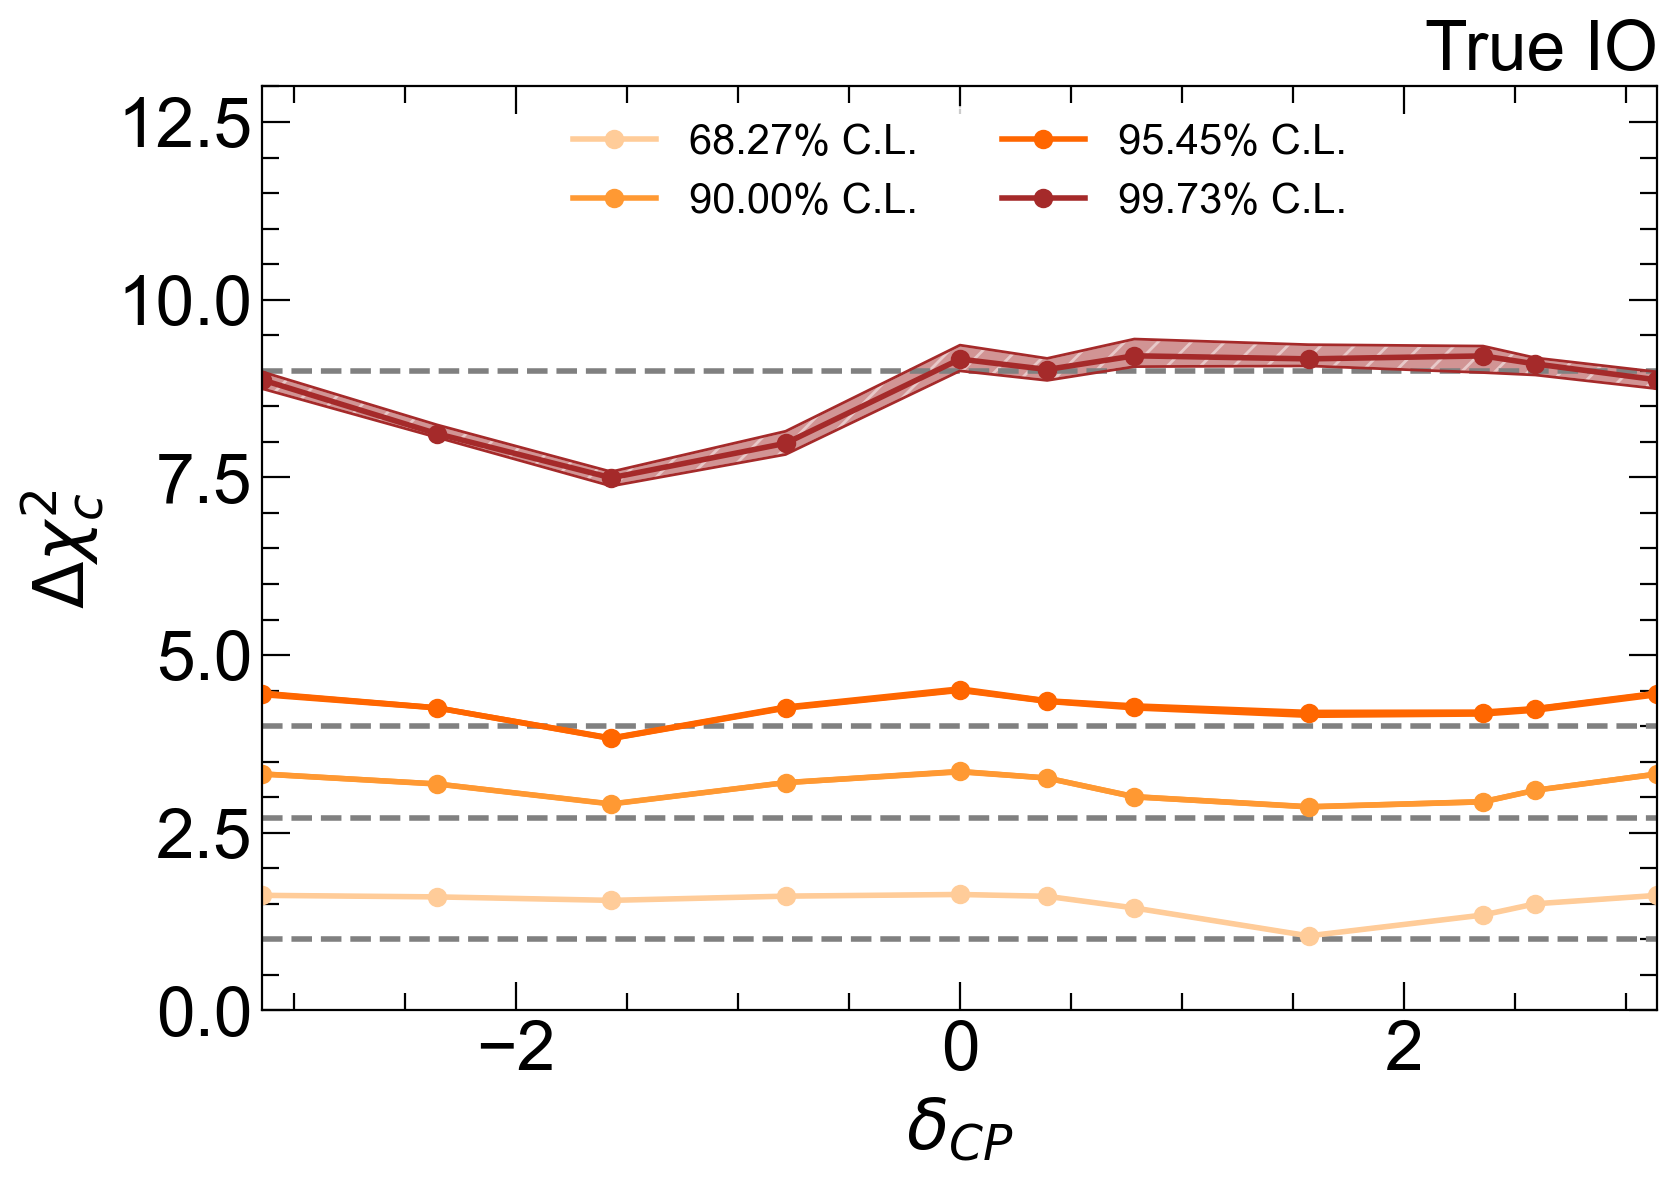

In [13]:
params_name_flatted = 'delta'

crit_val_central = defaultdict(list)
crit_val_lower = defaultdict(list)
crit_val_upper = defaultdict(list)
levels = []

for true_mh in [0, 1]:
    fig, ax = plt.subplots()
    plot_crit_val(ax, param_name, true_param_grid_sorted[params_name_flatted], true_mh)
    ax.set_title(f'True {mo_to_title[true_mh]}', loc='right')
    ax.set_ylim(0, 13)
    fig.savefig(f'{outputs_dir}/plots/{dir_ver}/FC/FC_critical_values_{params_name_flatted}_truemh{true_mh}.pdf', bbox_inches='tight')
    fig.savefig(f'{outputs_dir}/plots/{dir_ver}/FC/FC_critical_values_{params_name_flatted}_truemh{true_mh}.png', bbox_inches='tight', dpi=300)
    fig.savefig(f'{outputs_dir}/plots/{dir_ver}/FC/FC_critical_values_{params_name_flatted}_truemh{true_mh}.eps', bbox_inches='tight')
    fig.savefig(f'{outputs_dir}/plots/{dir_ver}/FC/FC_critical_values_{params_name_flatted}_truemh{true_mh}.svg', bbox_inches='tight')